In [1]:
import pandas as pd
import csv
import numpy as np
from pandas.tools.plotting import scatter_matrix
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline

import statsmodels.api as sm
from scipy import stats as st
import statsmodels.formula.api as sm
from statsmodels.graphics.api import abline_plot
import patsy
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
alist = []
ind = [0, 0]
exclusions = [[0, 1, 2, -1], [0]]
i = 0
for name in ['Education_Data.csv', 'VisionZero_Collisions.csv']:
    with open(name, mode='r') as afile:
        reader = csv.reader(afile)
        alist.append(dict((rows[ind[i]], [rows[r] for r in range(0, len(rows)) if r not in exclusions[i]]) for rows in reader))
        i+=1

In [3]:
#print alist[0]['PrecinctYear']
#print alist[1]['ID']
colnames = alist[0]['PrecinctYear']+alist[1]['ID']
print colnames

['Taxis', 'Flyers', 'Seniors', 'Outreach', 'HandsOn', 'Edu_Total', 'PERSONS_INJURED', 'PERSONS_KILLED', 'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 'CYCLIST_INJURED', 'CYCLIST_KILLED', 'MOTORIST_INJURED', 'MOTORIST_KILLED']


In [4]:
for key in alist[0].keys():
    if key.isdigit():
        alist[0][int(key)] = alist[0].pop(key)
    else: 
        del alist[0][key]

for key in alist[1].keys():
    if key.isdigit():
        alist[1][int(key)] = alist[1].pop(key)
    else: 
        del alist[1][key]
    
PrecinctDates = []
for i in range(0, len(alist)):
    PrecinctDates+= alist[i].keys()

PrecinctDates = np.unique(PrecinctDates)

In [5]:
#len(alist[1].values()[0])
a = 0
for i in range(0, len(alist)):
    a+= len(alist[i].values()[0])

In [6]:
lengths = []
for i in range(0, len(alist)):
    lengths.append(len(alist[i].values()[0]))
lengths
a

14

In [7]:
final_dictionary = {}
for p in PrecinctDates:
    rec = [0 for i in range(0, a)]
    if p in alist[0].keys():
        for i in range(0, lengths[0]):
            rec[i] = alist[0][p][i]
    if p in alist[1].keys():
        for i in range(0, lengths[1]):
            rec[i+lengths[0]] = alist[1][p][i]    
    final_dictionary[p] = rec

In [8]:
df = pd.DataFrame(final_dictionary.items(), columns=['PrecinctYear', 'Data'])

In [9]:
df['Precinct'] = df['PrecinctYear'].apply(lambda x: str(x)[:-4])
df['Year'] = df['PrecinctYear'].apply(lambda x: str(x)[-4:])

In [10]:
for i in range(0, a):
    df[colnames[i]] = df['Data'].apply(lambda x: int(x[i]))

In [11]:
del df['Data']

In [12]:
df.head(5)

PrecinctYear Precinct  Year  Taxis  Flyers  Seniors  Outreach  HandsOn  \
0        342016       34  2016      0       0        1         5        0   
1        502016       50  2016      0       0        0         2        1   
2       1012013      101  2013      0       0        0         0        0   
3        722013       72  2013      0       0        0         0        0   
4       1132016      113  2016      0       0        1         6        0   

   Edu_Total  PERSONS_INJURED  PERSONS_KILLED  PEDESTRIANS_INJURED  \
0          6                0               0                    0   
1          3                0               0                    0   
2          0              268               2                   55   
3          0              726               2                  167   
4          7                0               0                    0   

   PEDESTRIANS_KILLED  CYCLIST_INJURED  CYCLIST_KILLED  MOTORIST_INJURED  \
0                   0                0               0                 0   
1                   0                0               0                 0   
2                   0               11               0               202   
3                   1               76               0               483   
4                   0                0               0                 0   

   MOTORIST_KILLED  
0                0  
1                0  
2                2  
3                1  
4                0

In [13]:
df.to_csv('Merged.csv')

In [14]:
for i in range(0, len(colnames)):
   mean_ = np.mean(df[colnames[i]])
   stdv_ = np.std(df[colnames[i]])
   df[colnames[i]] = df[colnames[i]].apply(lambda x: 1.0*(x - mean_)/stdv_)

In [15]:
del df['PrecinctYear']
del df['Precinct']
del df['Year']
del df['Edu_Total']

In [16]:
df

Taxis    Flyers   Seniors  Outreach   HandsOn  PERSONS_INJURED  \
0   -0.338179 -0.299713  0.011813 -0.041341 -0.523637        -1.197858   
1   -0.338179 -0.299713 -0.588663 -0.574121  0.173783        -1.197858   
2   -0.338179 -0.299713 -0.588663 -0.929307 -0.523637        -0.463443   
3   -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         0.791639   
4   -0.338179 -0.299713  0.011813  0.136252 -0.523637        -1.197858   
5   -0.338179  3.549231  1.813238  0.313845  0.173783         1.030050   
6   -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         0.827263   
7   -0.338179  0.662523  7.217514 -0.396528 -0.523637         0.747793   
8   -0.002203 -0.299713  0.612288 -0.396528  0.173783         0.597074   
9   -0.338179 -0.299713  0.011813 -0.574121  0.173783        -1.197858   
10  -0.338179 -0.299713  0.011813  0.846624 -0.523637         0.734091   
11  -0.338179 -0.299713  5.416089  1.734590 -0.523637         0.292894   
12  -0.002203 -0.299713  0.612288  1.912183  0.173783         0.281933   
13  -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         0.671063   
14  -0.002203 -0.299713  0.612288  2.089776  0.871204         0.254529   
15  -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         0.413470   
16  -0.338179 -0.299713  1.813238 -0.218934 -0.523637         0.487460   
17   1.005725 -0.299713  1.212763  1.024217  0.871204         0.262751   
18  -0.338179 -0.299713  0.612288  0.491438 -0.523637        -1.197858   
19  -0.338179 -0.299713  0.612288  0.669031  0.871204        -1.197858   
20  -0.338179 -0.299713  0.011813 -0.574121 -0.523637        -1.197858   
21  -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         1.087597   
22  -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         1.742542   
23   2.349629 -0.299713  0.612288 -0.218934 -0.523637         1.186250   
24  -0.338179 -0.299713 -0.588663  0.313845 -0.523637        -1.197858   
25  -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         1.380815   
26  -0.338179 -0.299713  0.612288  2.622555  0.871204         1.460285   
27  -0.338179 -0.299713 -0.588663 -0.929307 -0.523637        -0.088015   
28  -0.338179 -0.299713  1.212763 -0.574121 -0.523637        -1.197858   
29   0.669749 -0.299713  0.011813 -0.574121 -0.523637         0.545007   
..        ...       ...       ...       ...       ...              ...   
275 -0.338179  3.549231  0.011813  0.846624  0.871204         1.238316   
276 -0.338179 -0.299713  0.612288  1.734590 -0.523637         1.345190   
277 -0.338179 -0.299713  0.011813 -0.574121 -0.523637        -1.197858   
278 -0.338179  2.586995 -0.588663  0.846624 -0.523637         0.649140   
279 -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         0.975242   
280 -0.338179  4.511468  1.212763  1.024217 -0.523637         1.520573   
281 -0.338179 -0.299713 -0.588663 -0.041341 -0.523637        -0.827910   
282 -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         0.501161   
283 -0.338179 -0.299713 -0.588663 -0.929307 -0.523637        -0.309983   
284 -0.338179 -0.299713 -0.588663  0.313845 -0.523637        -1.197858   
285 -0.338179 -0.299713 -0.588663  0.136252 -0.523637        -0.471664   
286 -0.338179 -0.299713  0.612288  0.136252 -0.523637        -1.197858   
287 -0.338179 -0.299713  0.612288  0.136252 -0.523637        -1.197858   
288  1.677677 -0.299713  0.011813  0.491438  0.173783         0.358663   
289 -0.338179 -0.299713 -0.588663 -0.929307 -0.523637        -0.120899   
290 -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         0.117512   
291 -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         0.136694   
292 -0.338179  1.624759 -0.588663 -0.751714  0.173783         0.018859   
293 -0.338179 -0.299713 -0.588663 -0.929307 -0.523637         0.128473   
294 -0.338179 -0.299713  0.011813 -0.574121 -0.523637        -1.197858   
295 -0.338179 -0.299713  0.612288  0.669031  0.871204        -1.197858   
296 -0.338179  4.511468  0.011813  0.491438  0.173783        -0.386713   
297 -0.33817

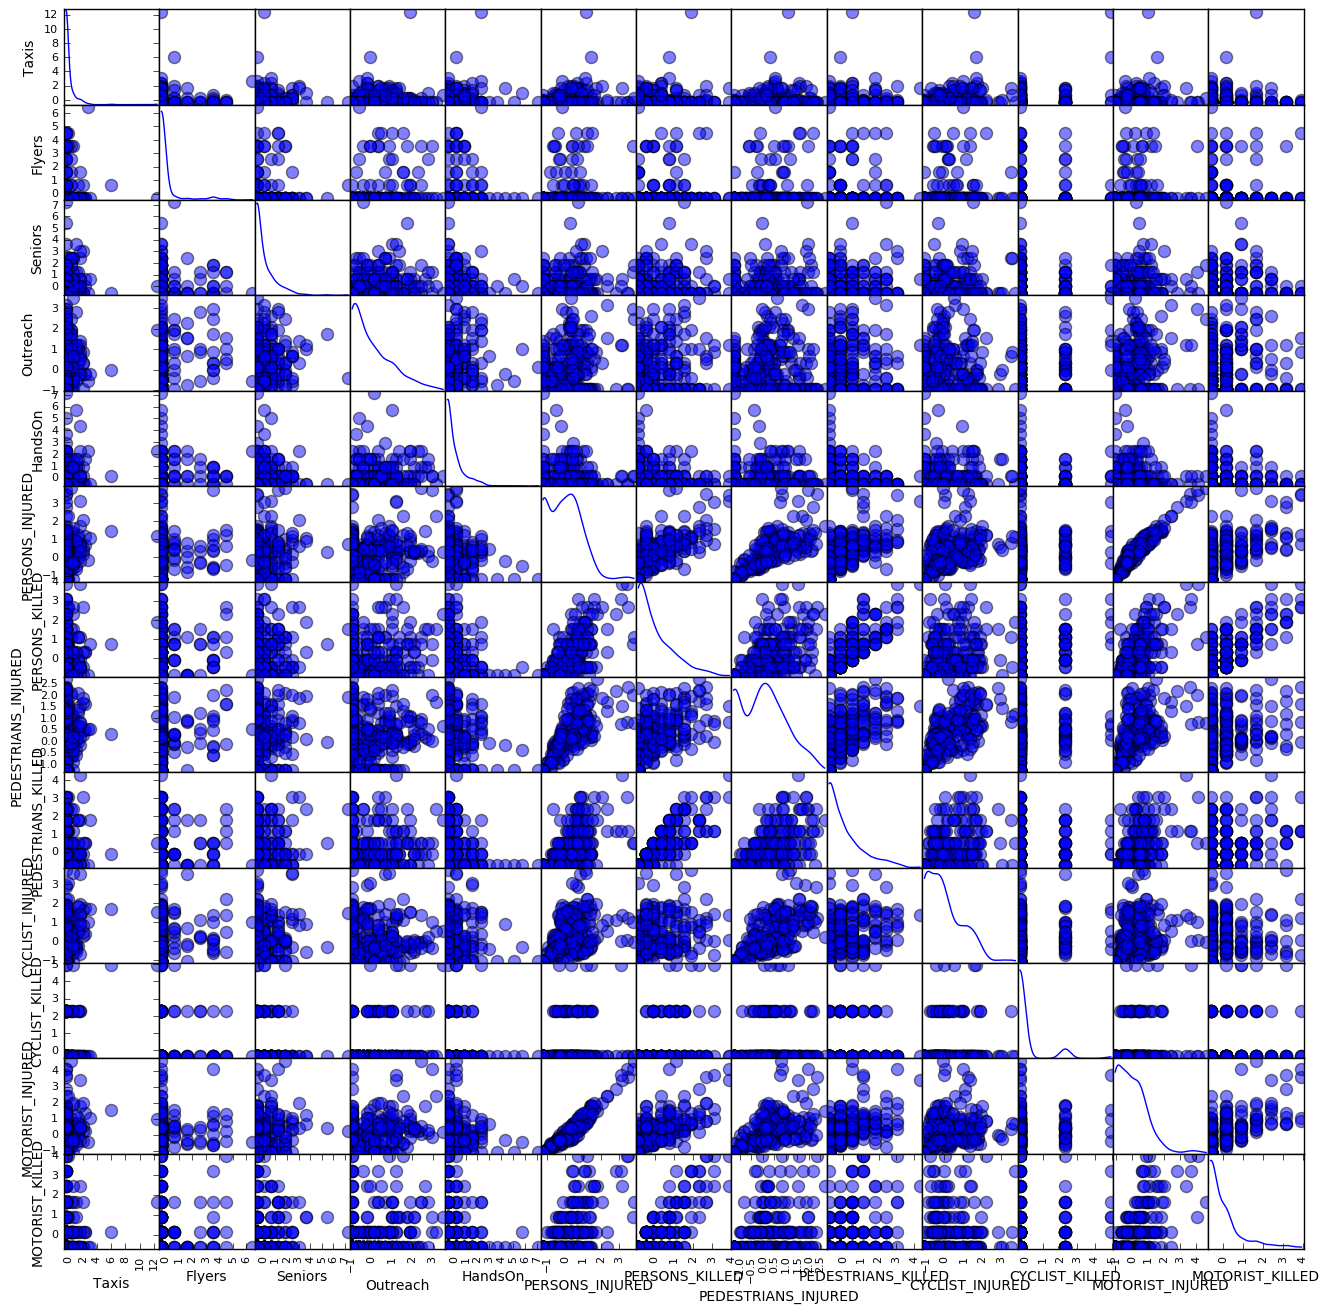

In [17]:
plot = scatter_matrix (df, s=300, figsize=(16, 16), diagonal='kde')

In [18]:
colnames[6:14:2]

['PERSONS_INJURED',
 'PEDESTRIANS_INJURED',
 'CYCLIST_INJURED',
 'MOTORIST_INJURED']

In [19]:
# #print colnames[6]+colnames[8]+colnames[10]+colnames[12]
# df[colnames[6]] = df[colnames[6]].apply(lambda x: np.log(x+1))
# df[colnames[8]] = df[colnames[8]].apply(lambda x: np.log(x+1))
# df[colnames[10]] = df[colnames[10]].apply(lambda x: np.log(x+1))
# df[colnames[12]] = df[colnames[12]].apply(lambda x: np.log(x+1))

C:\Users\Anita_2\Anaconda\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


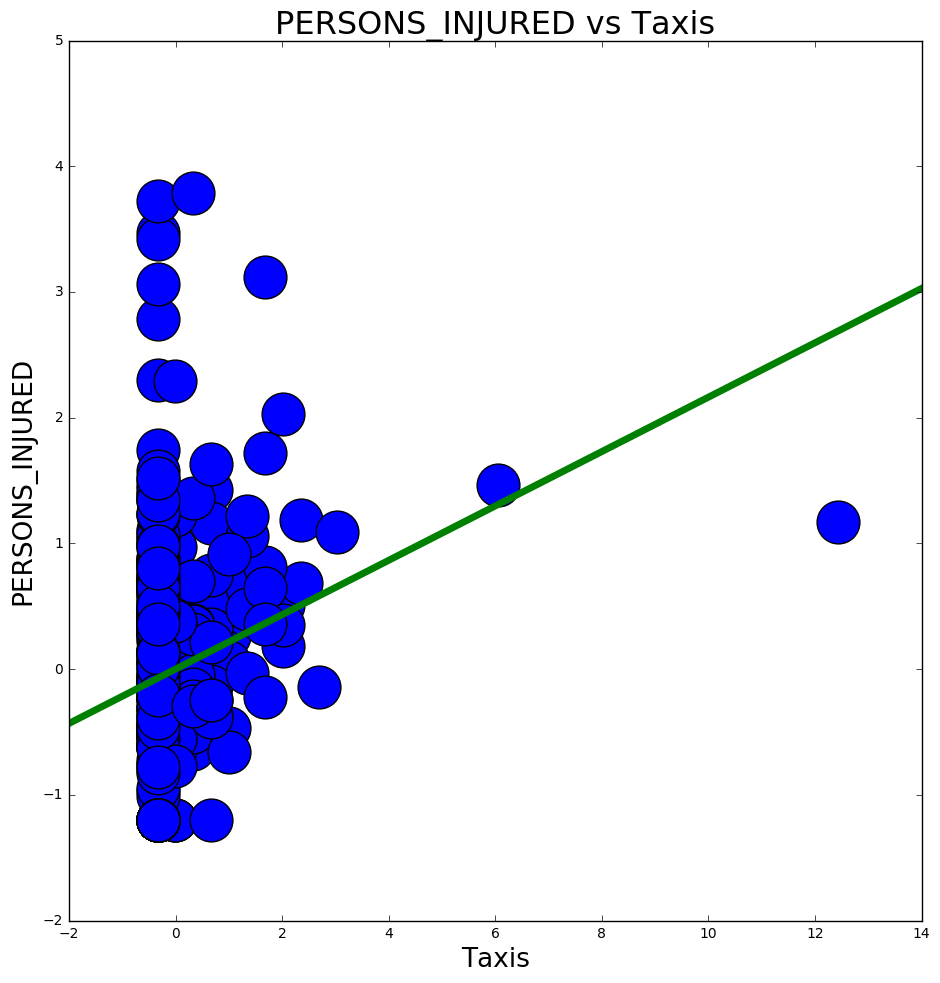

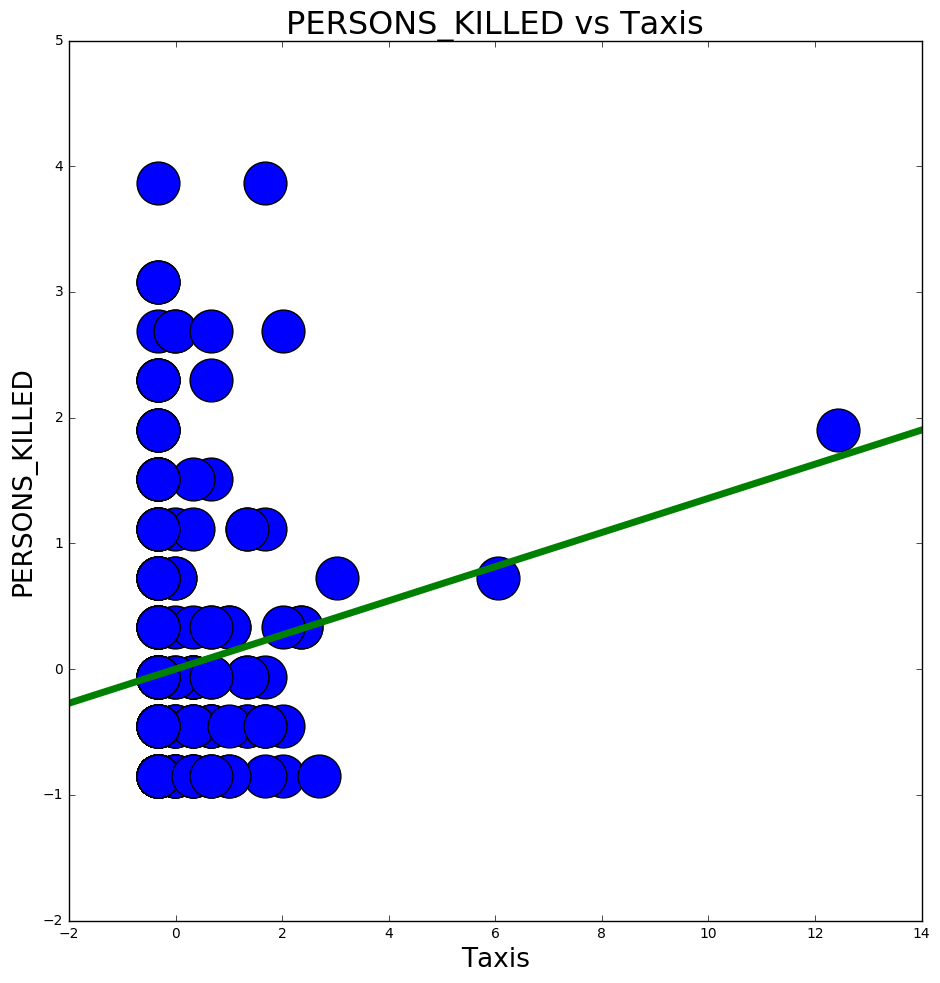

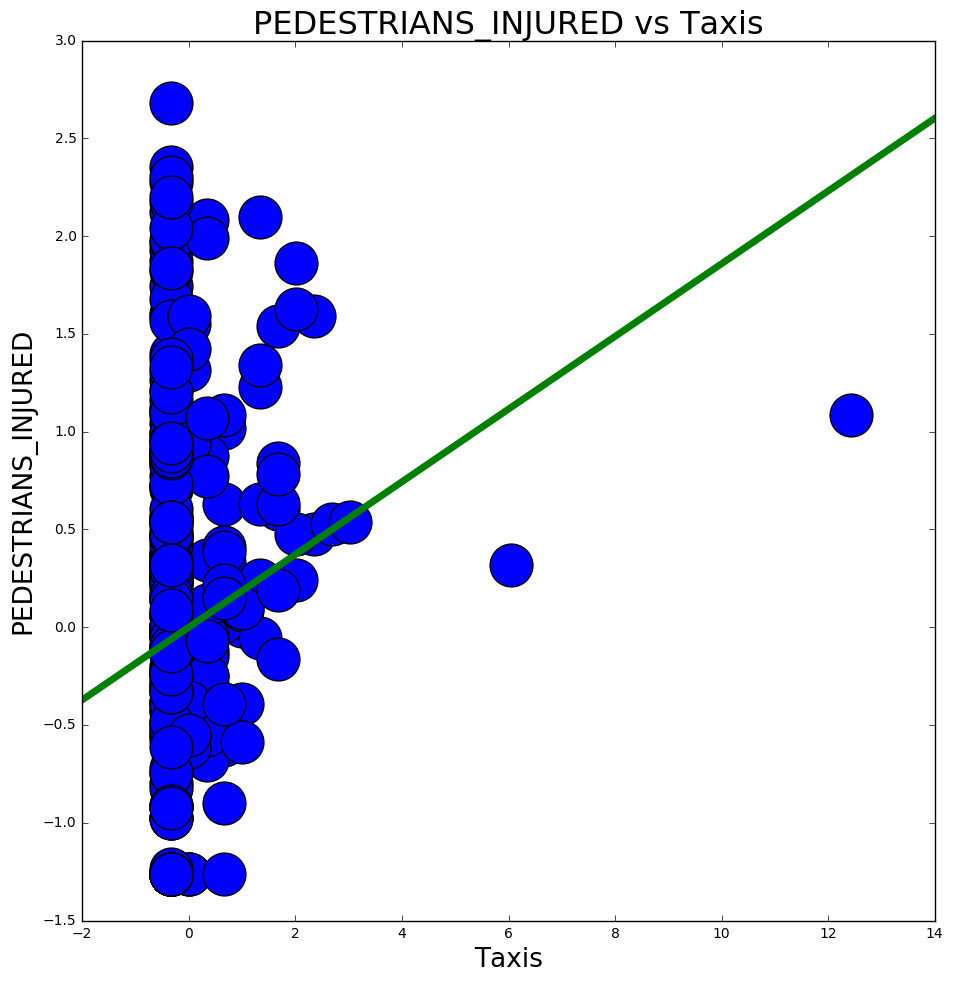

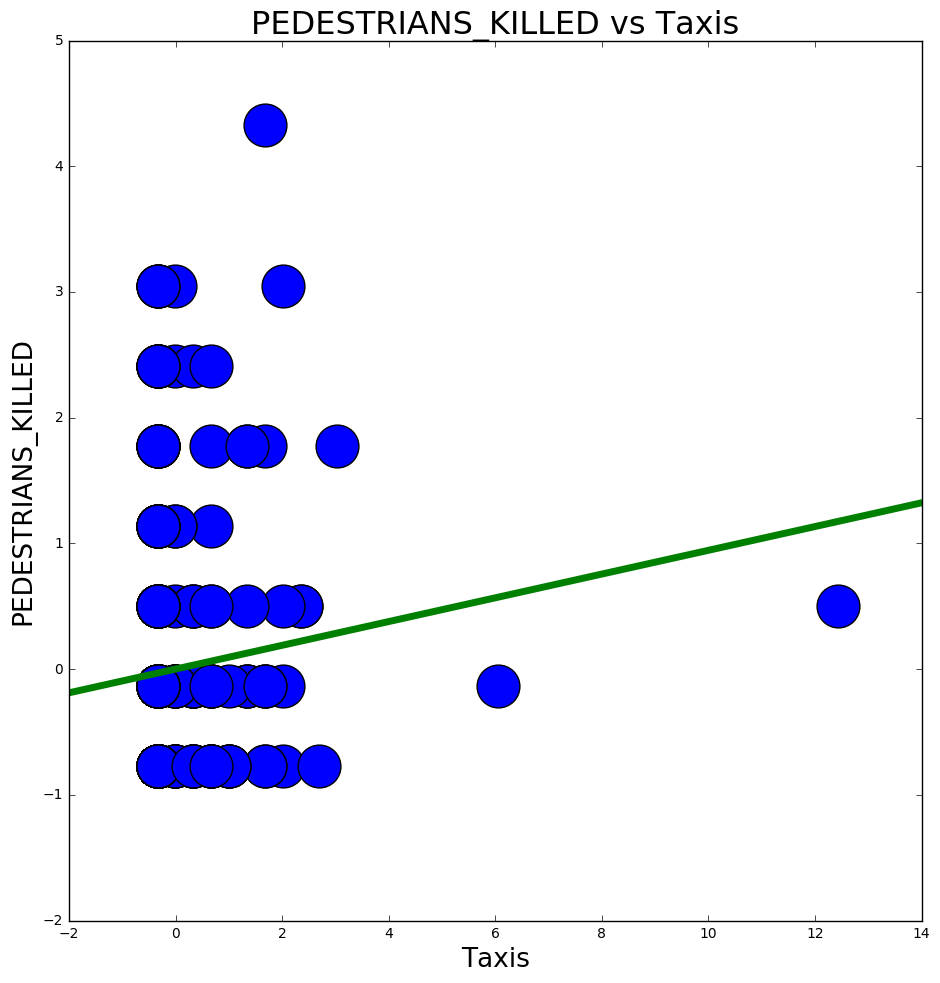

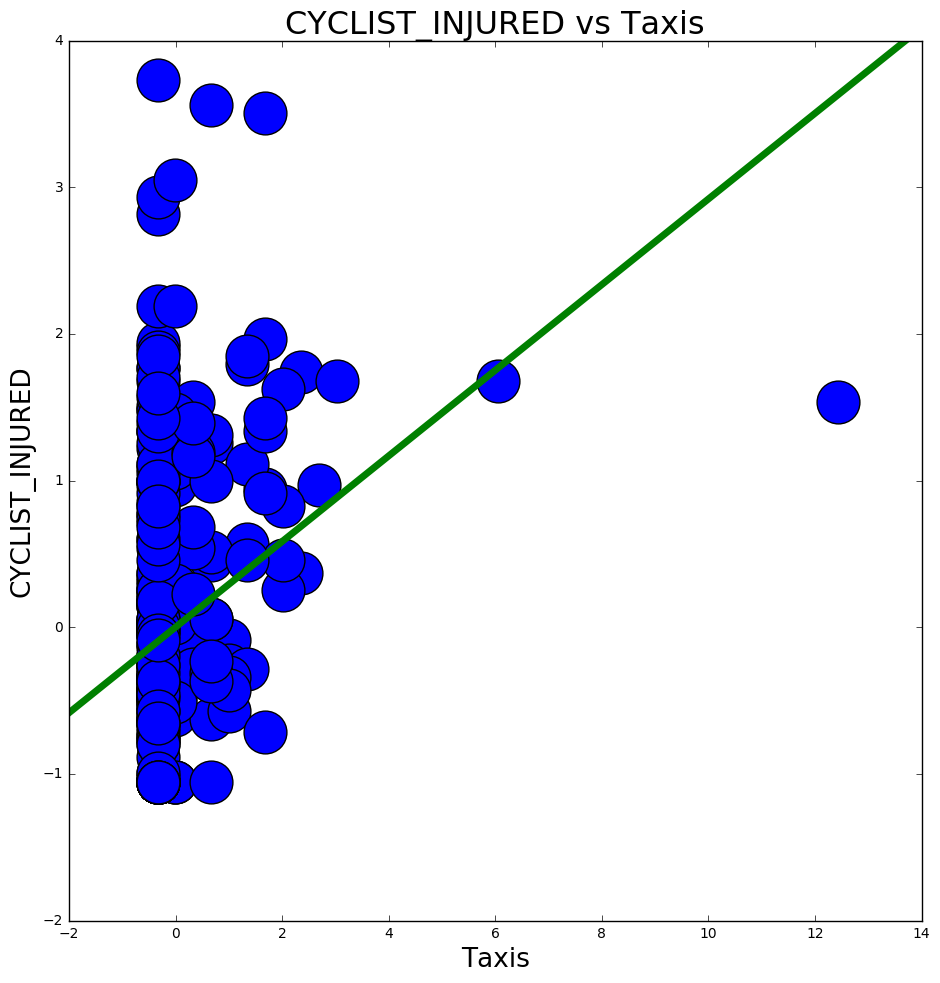

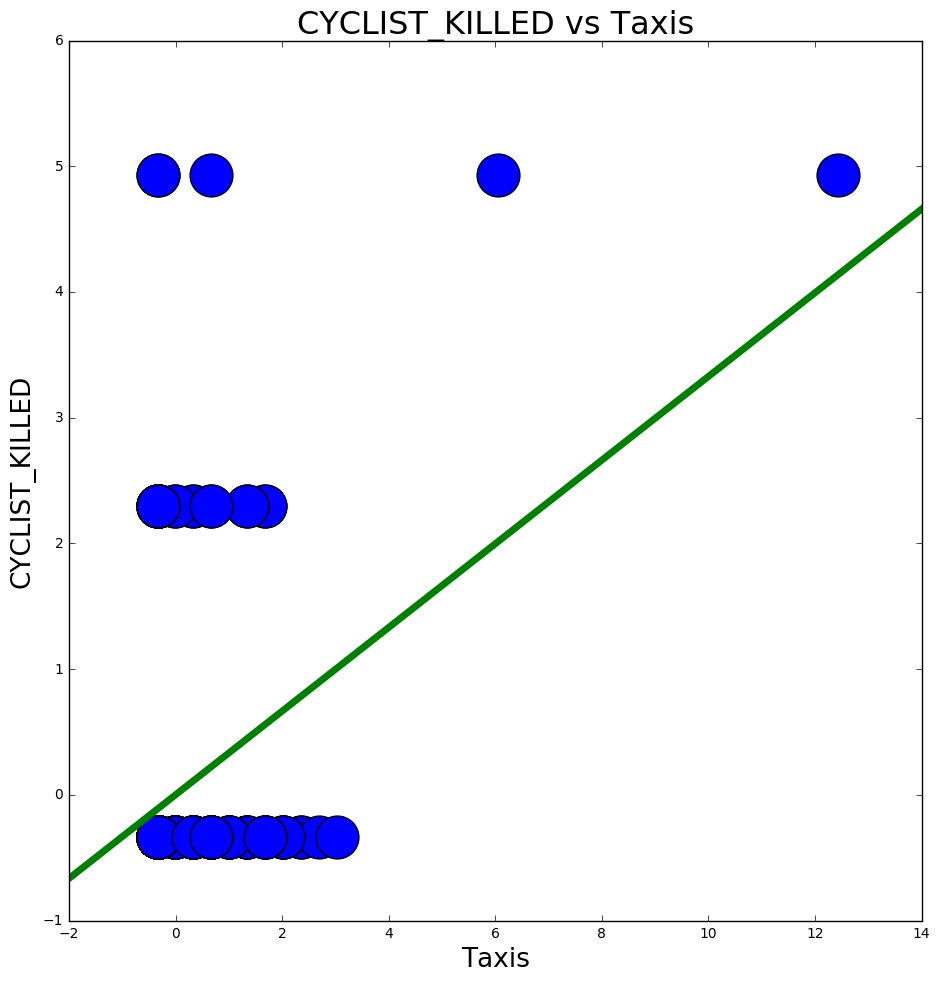

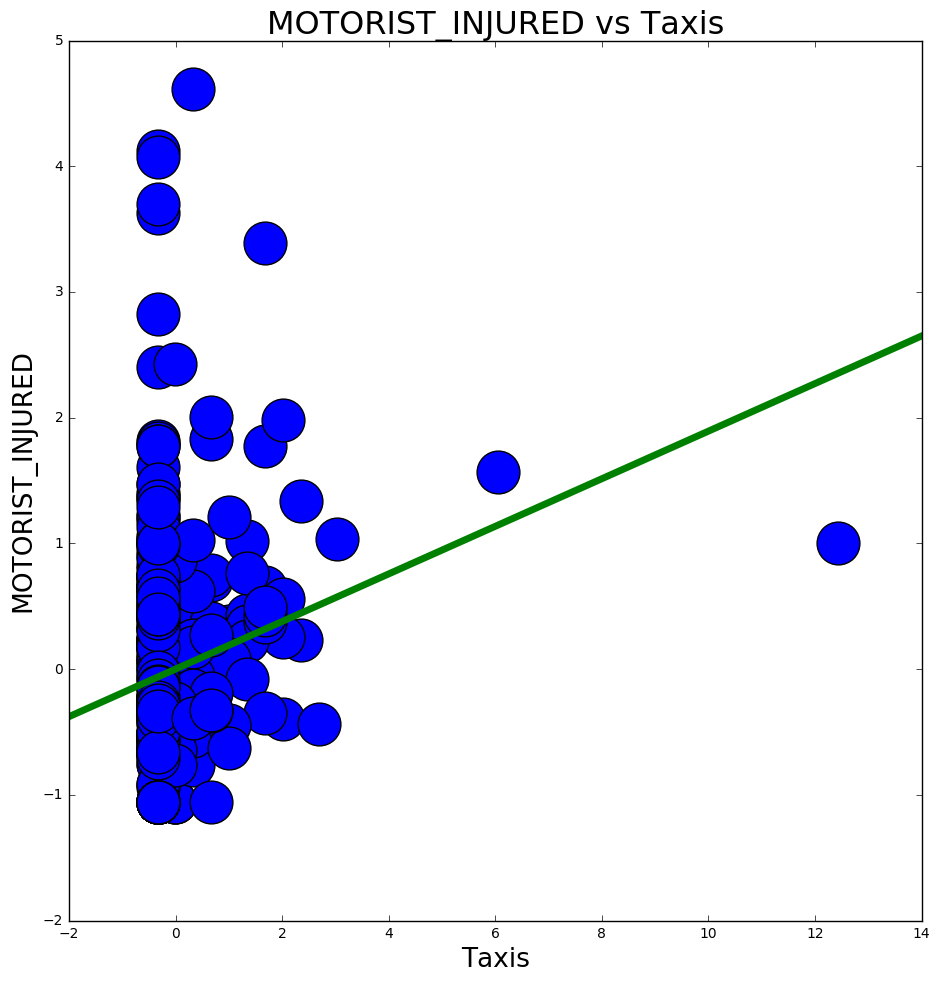

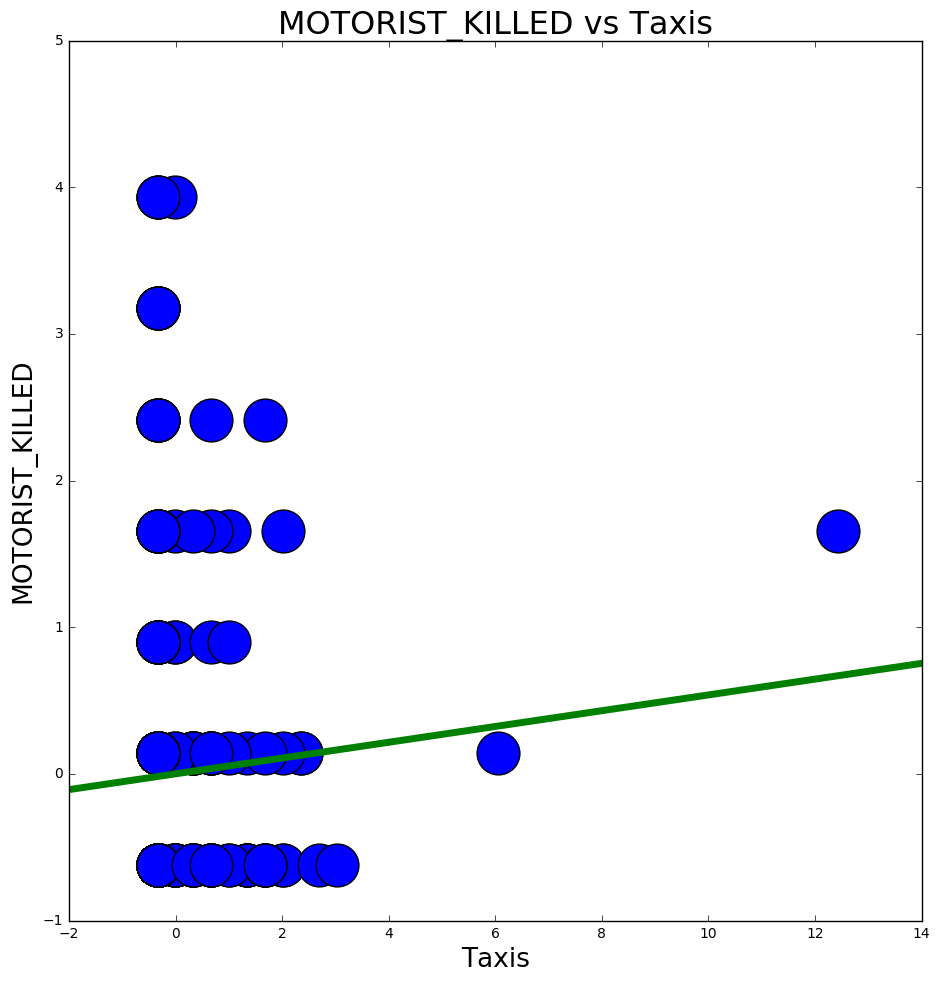

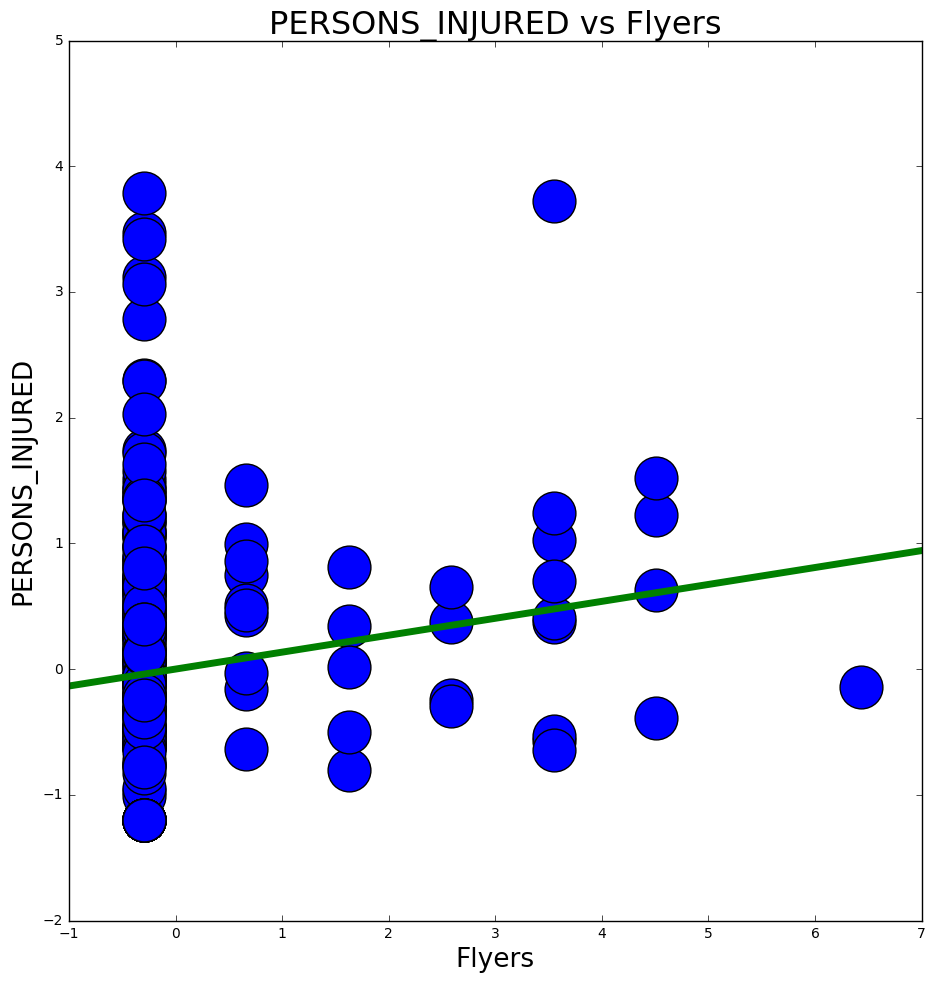

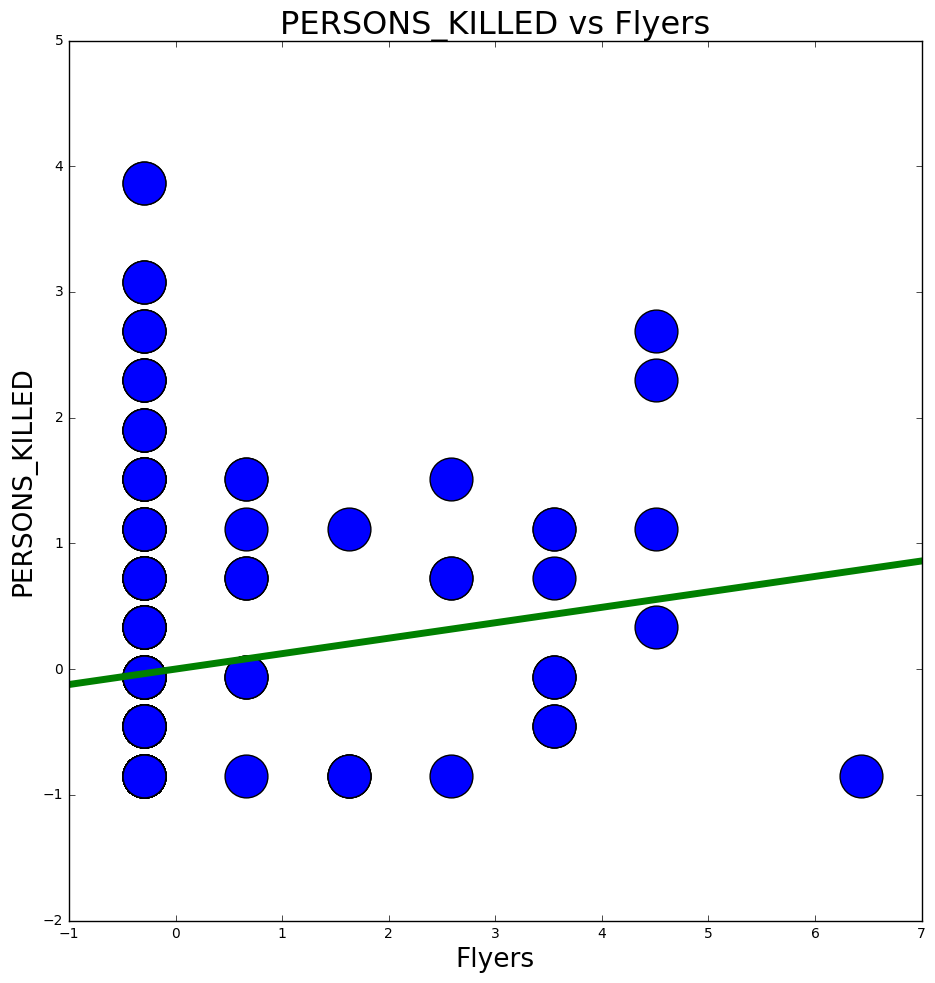

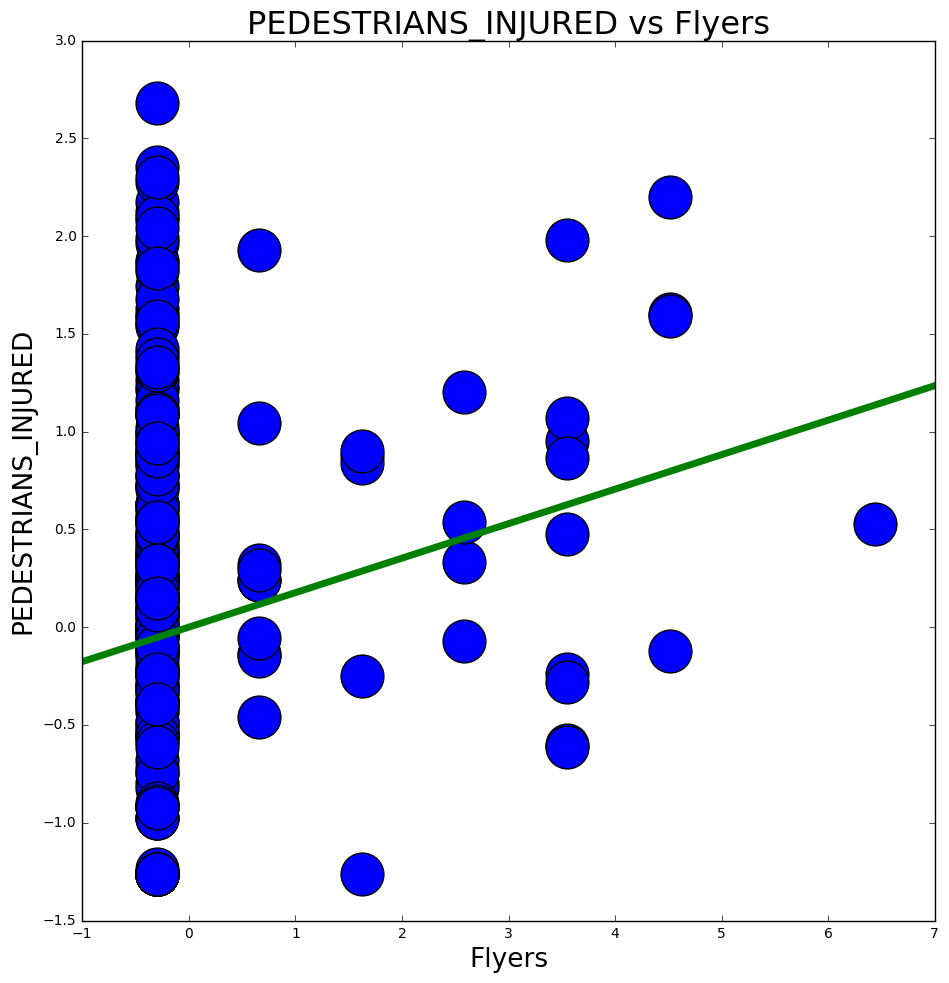

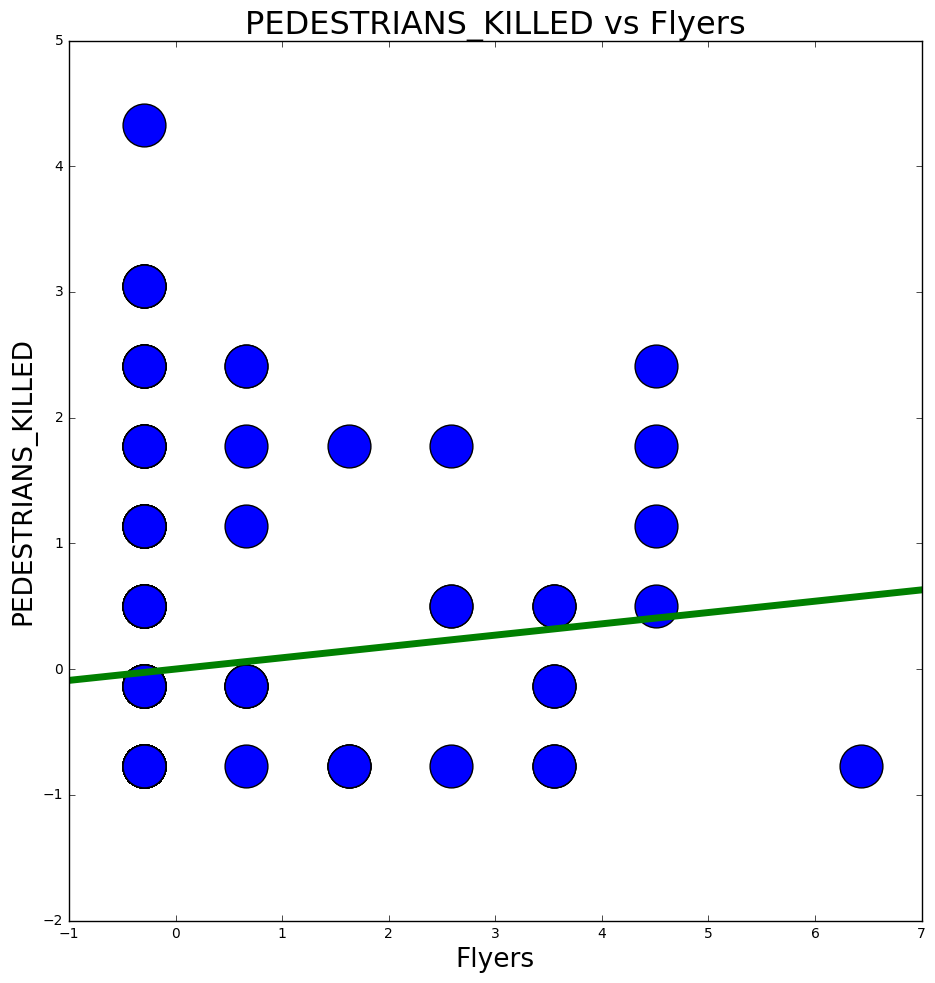

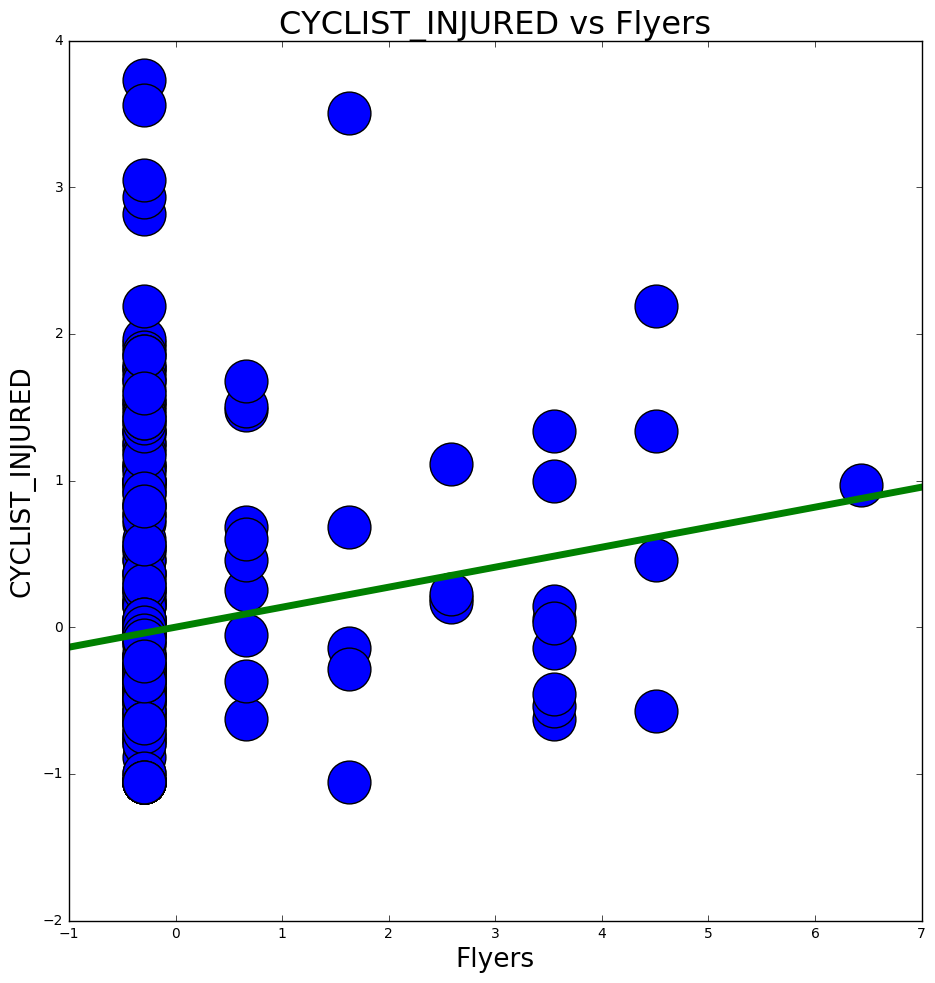

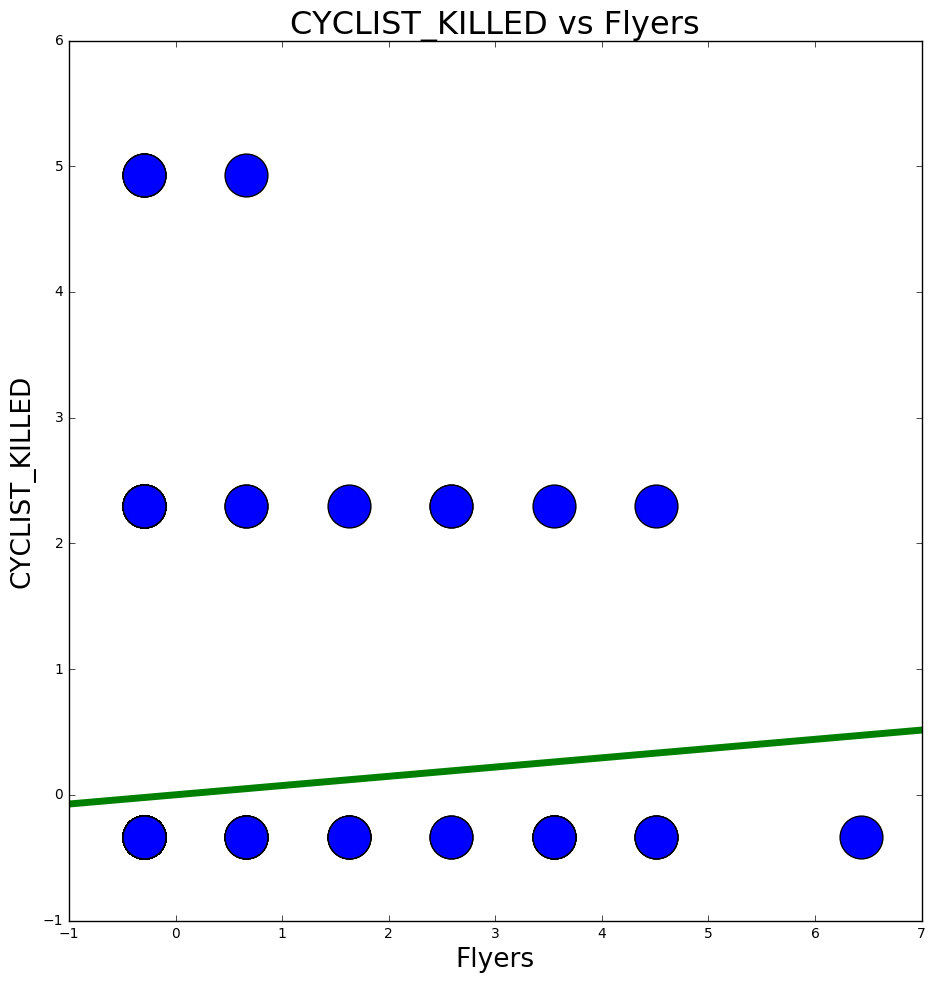

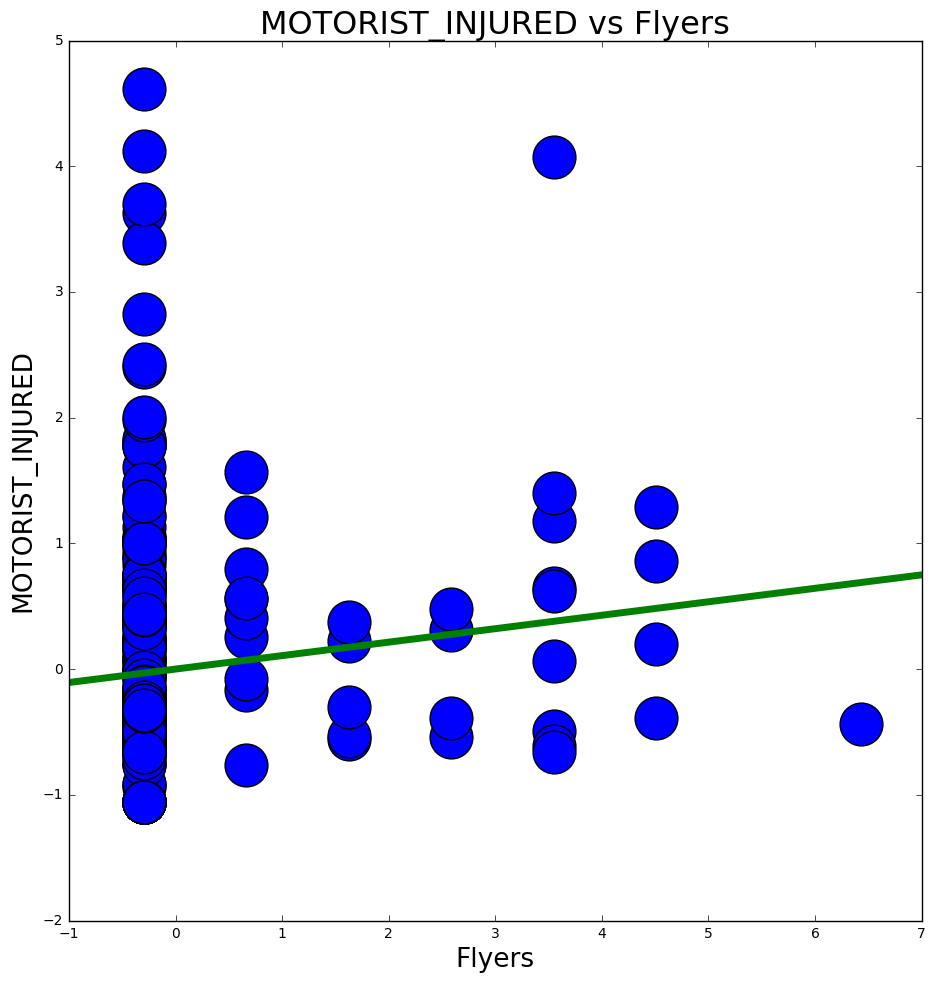

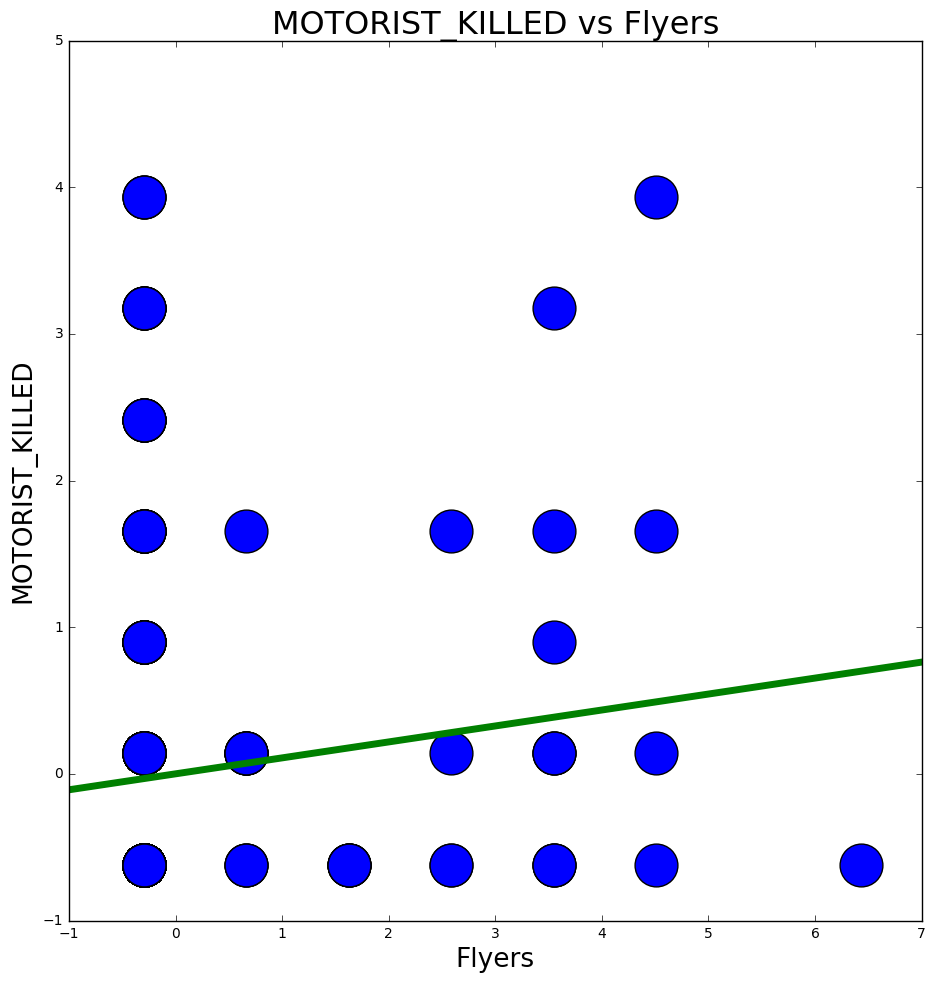

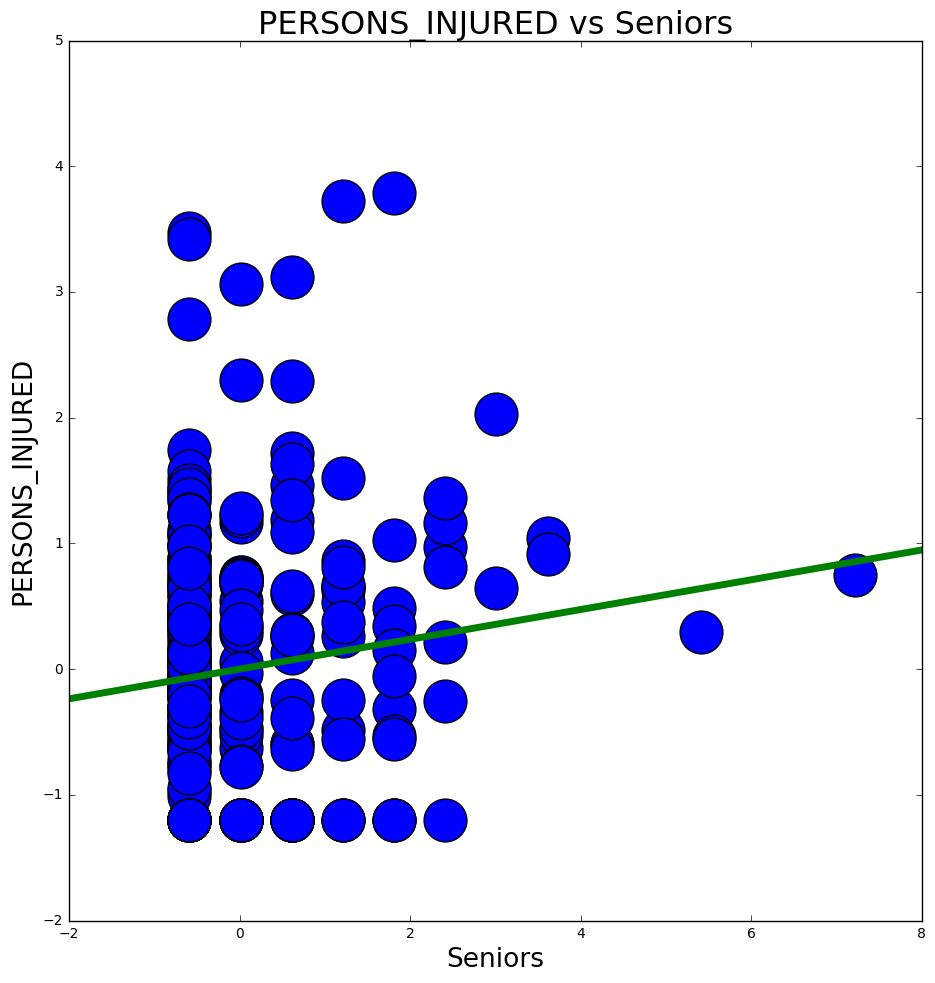

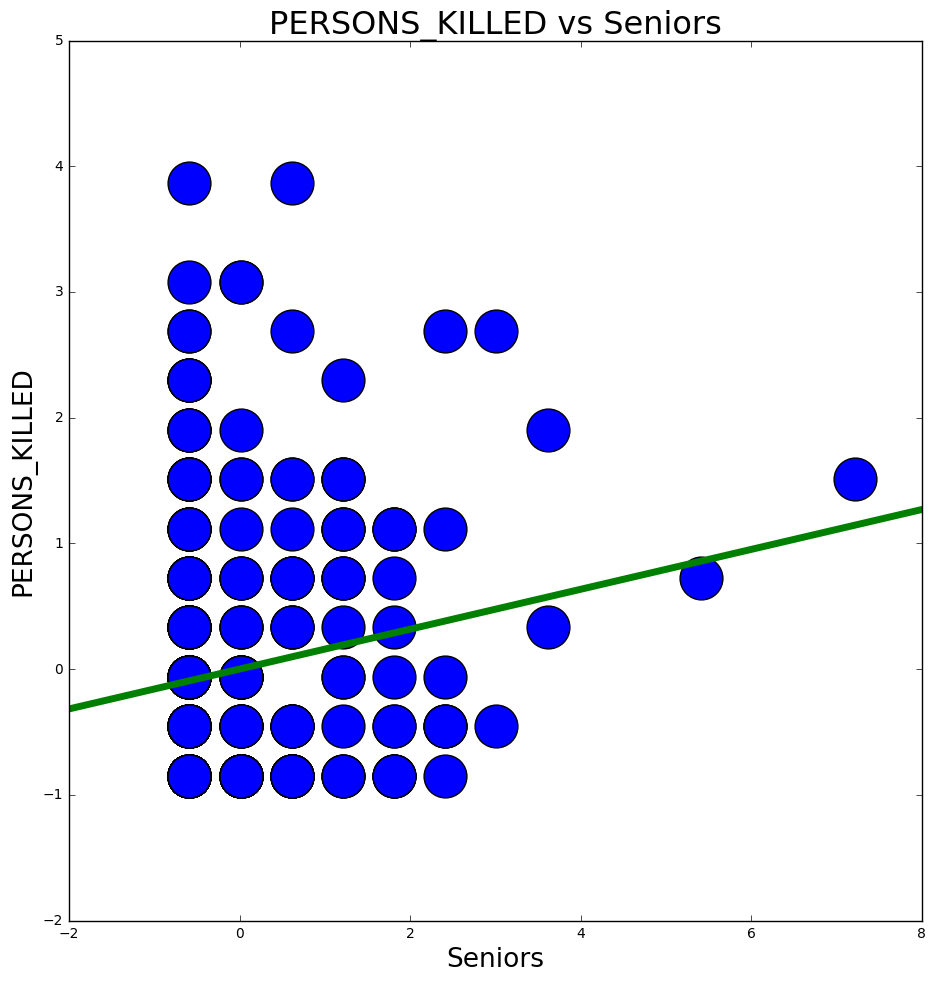

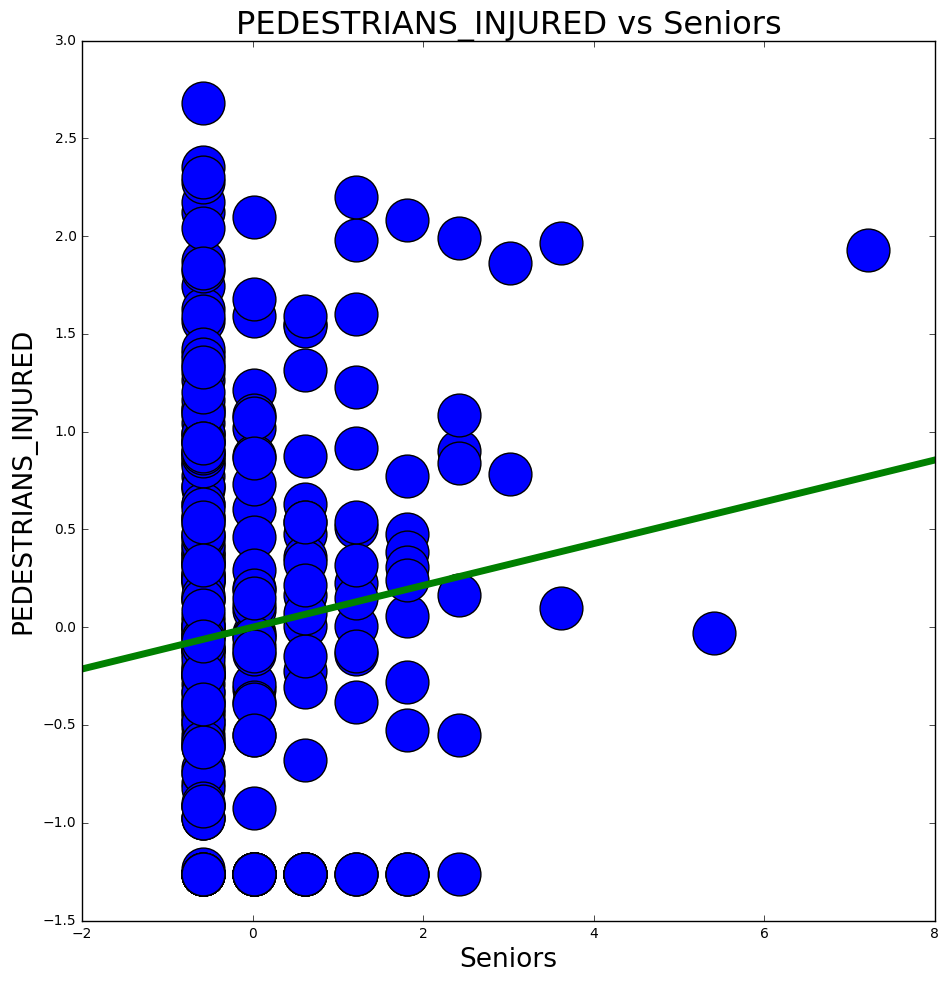

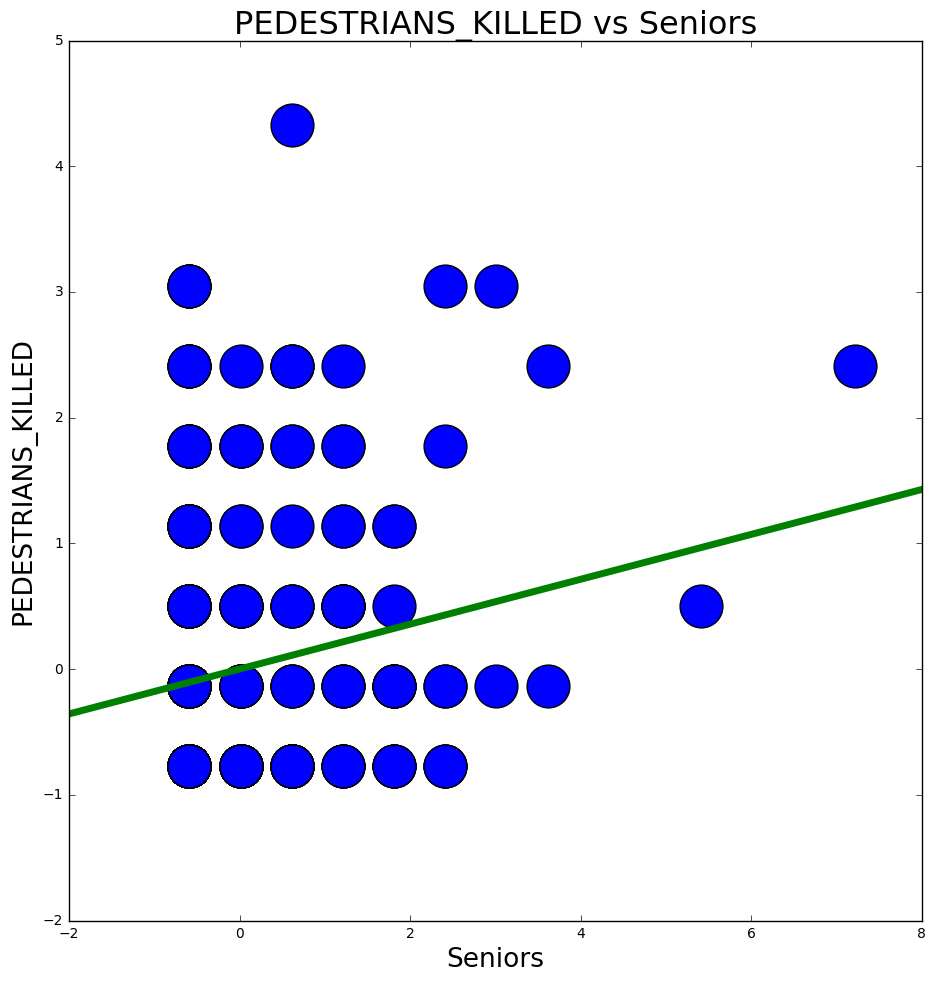

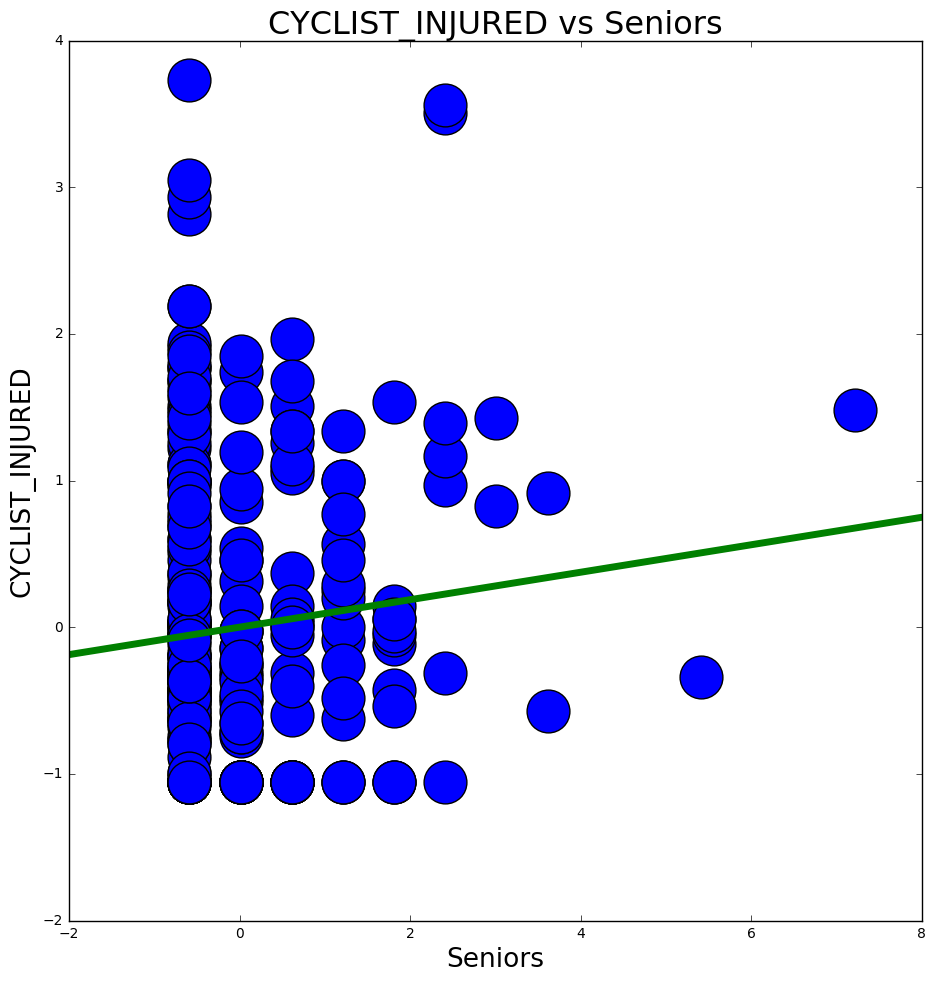

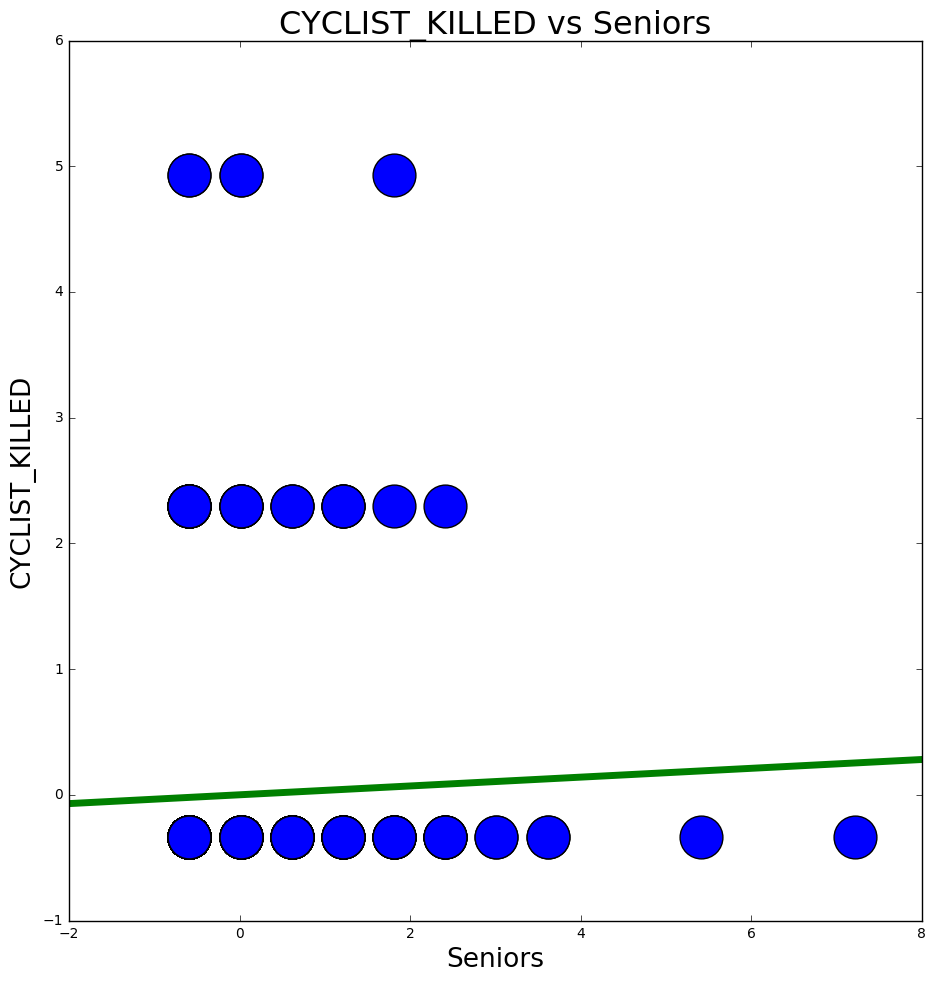

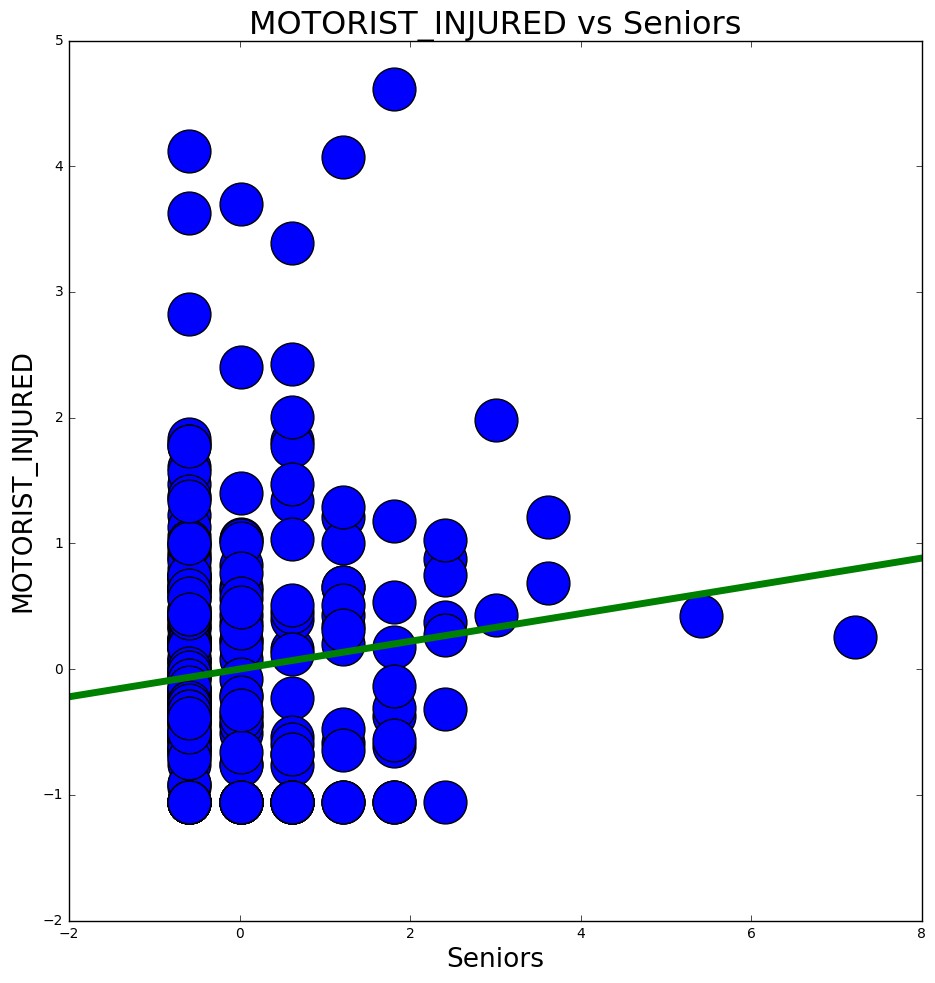

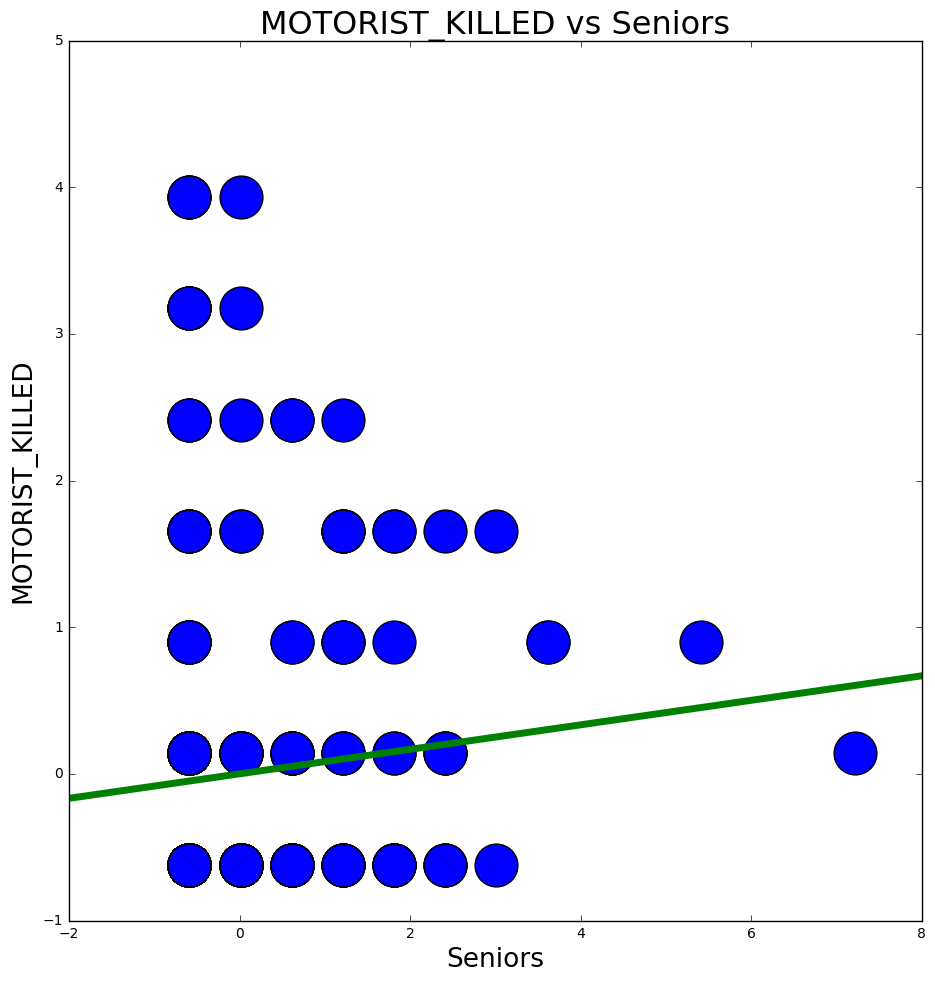

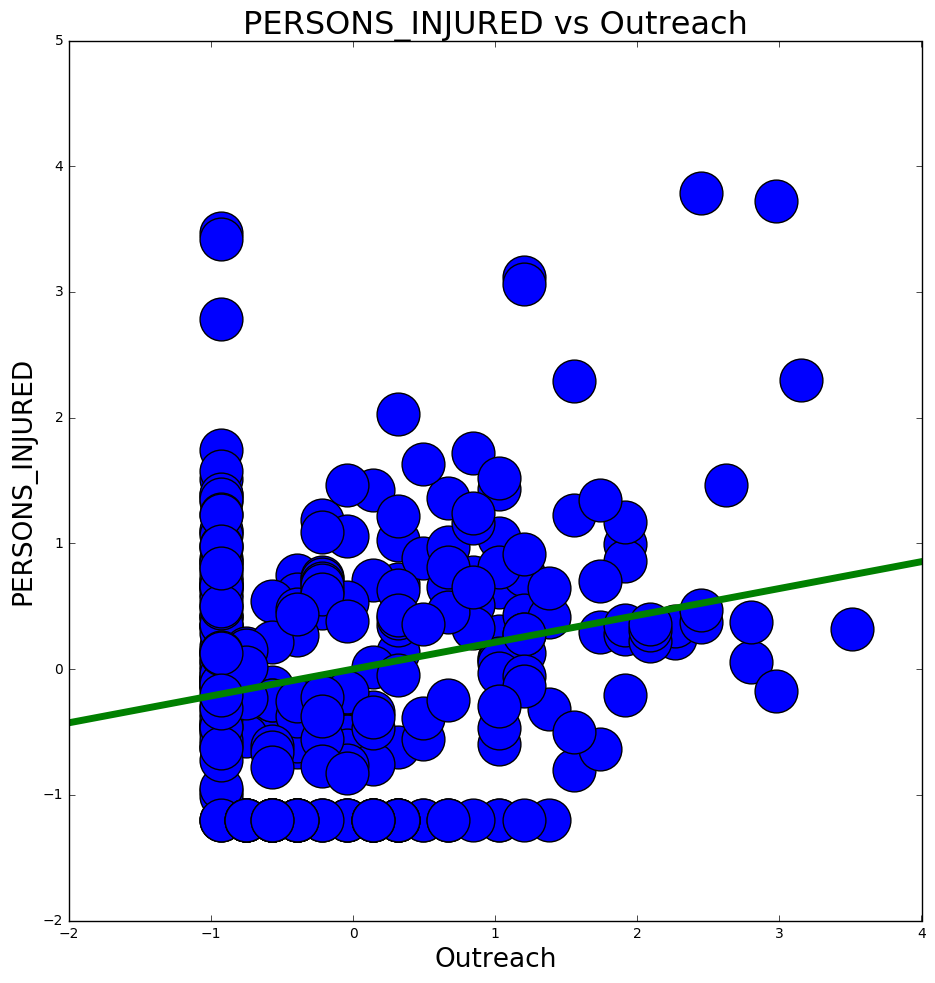

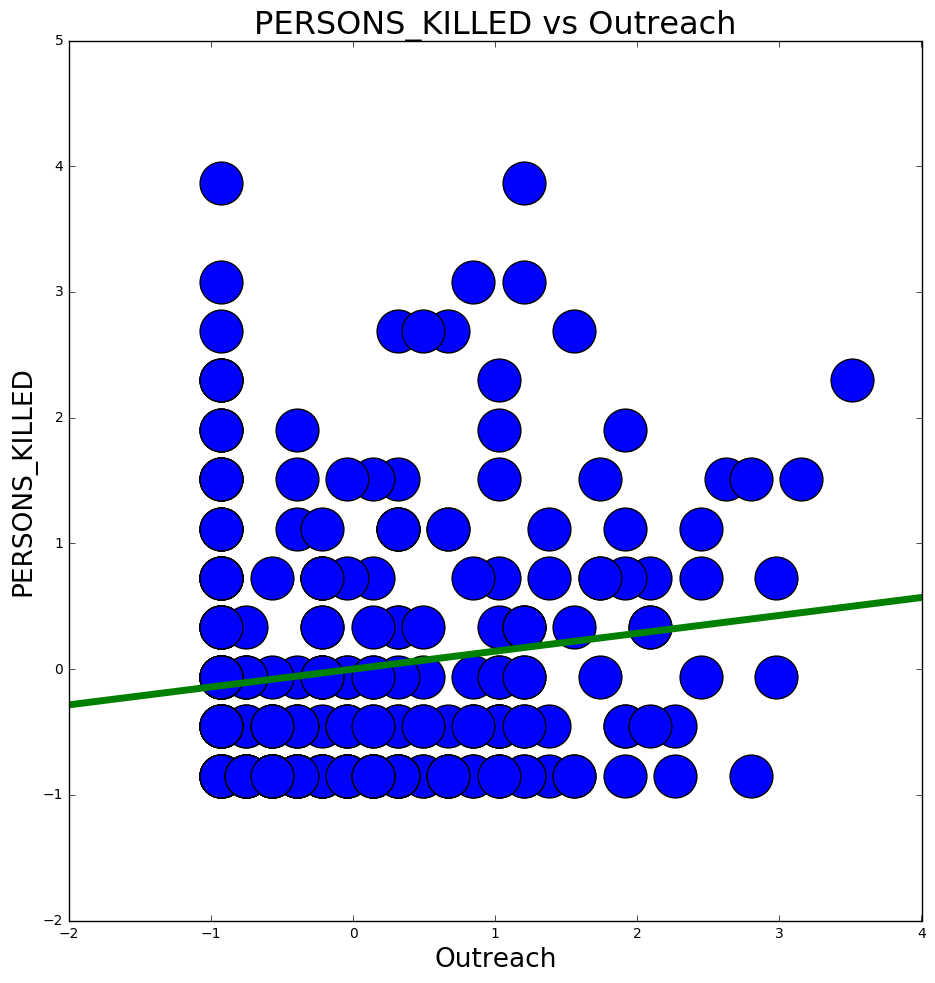

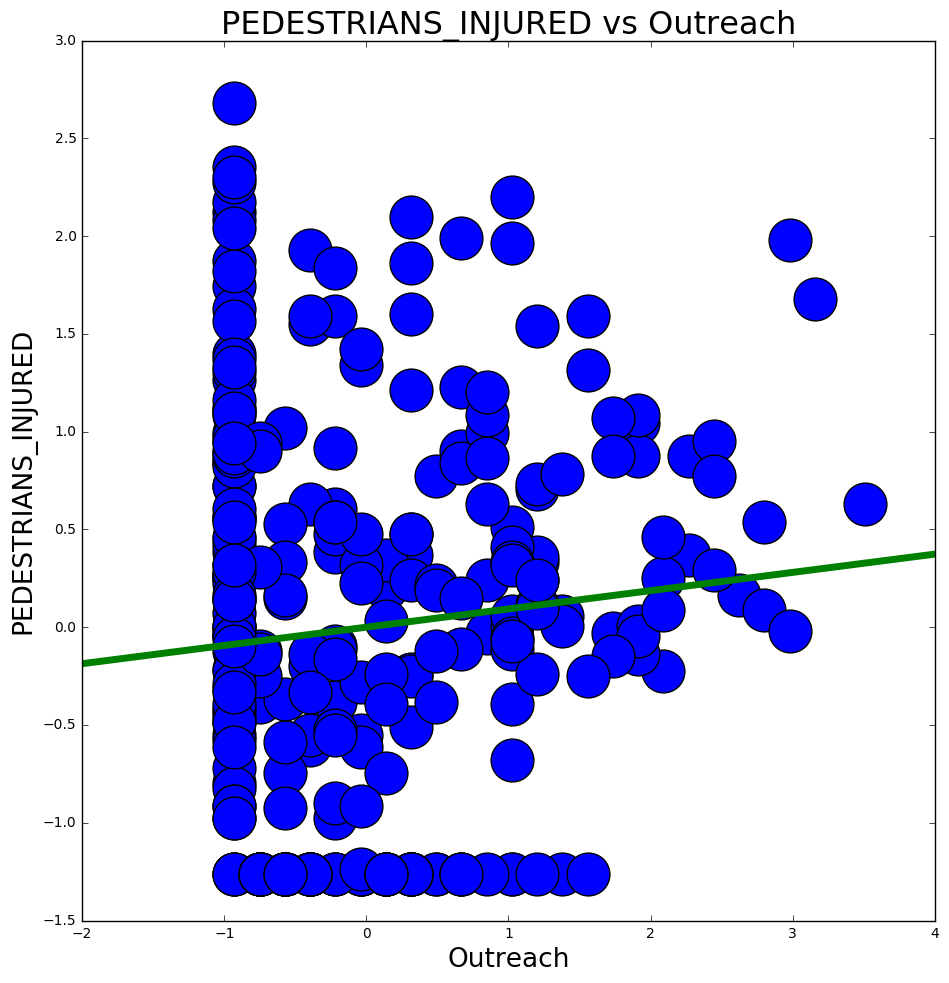

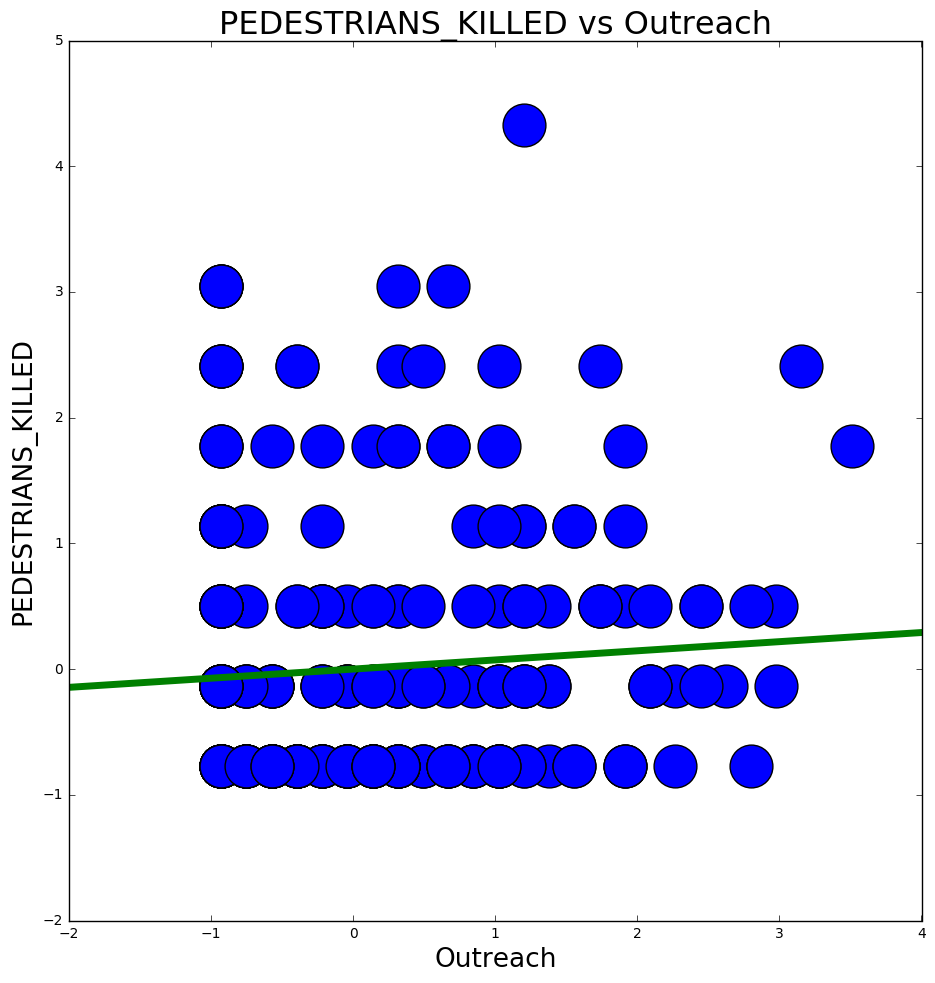

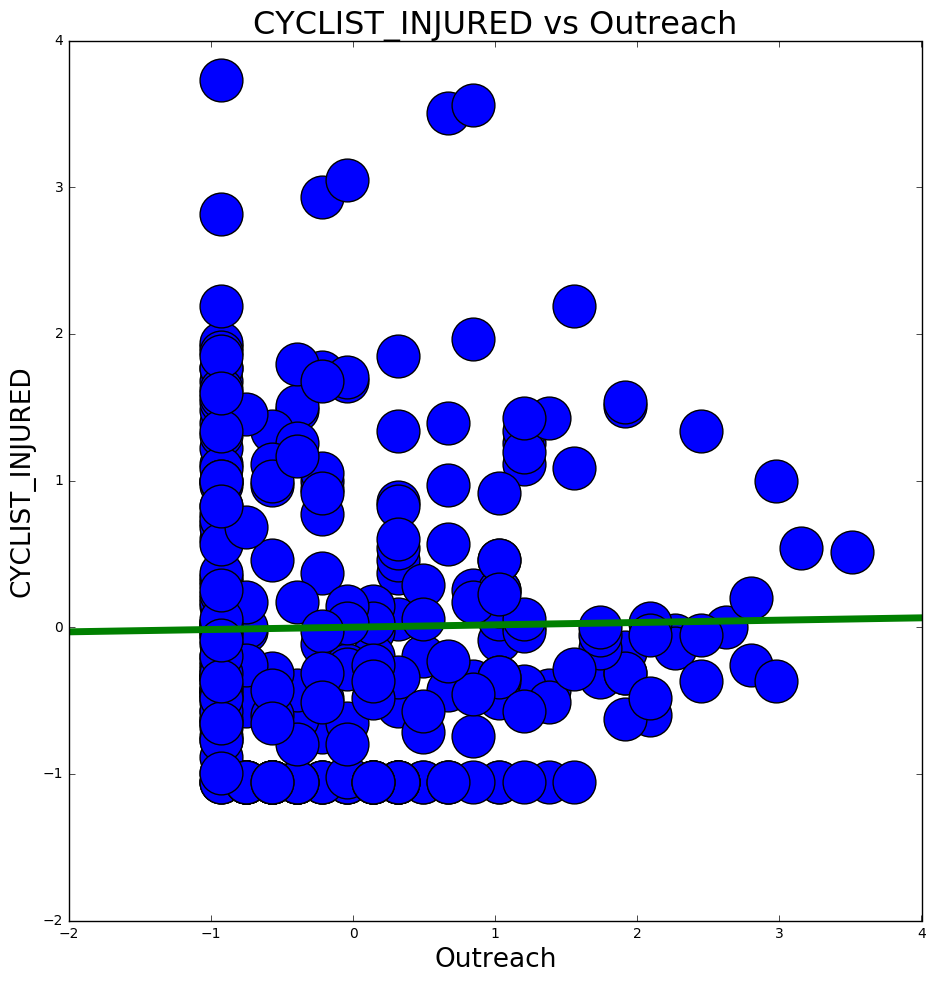

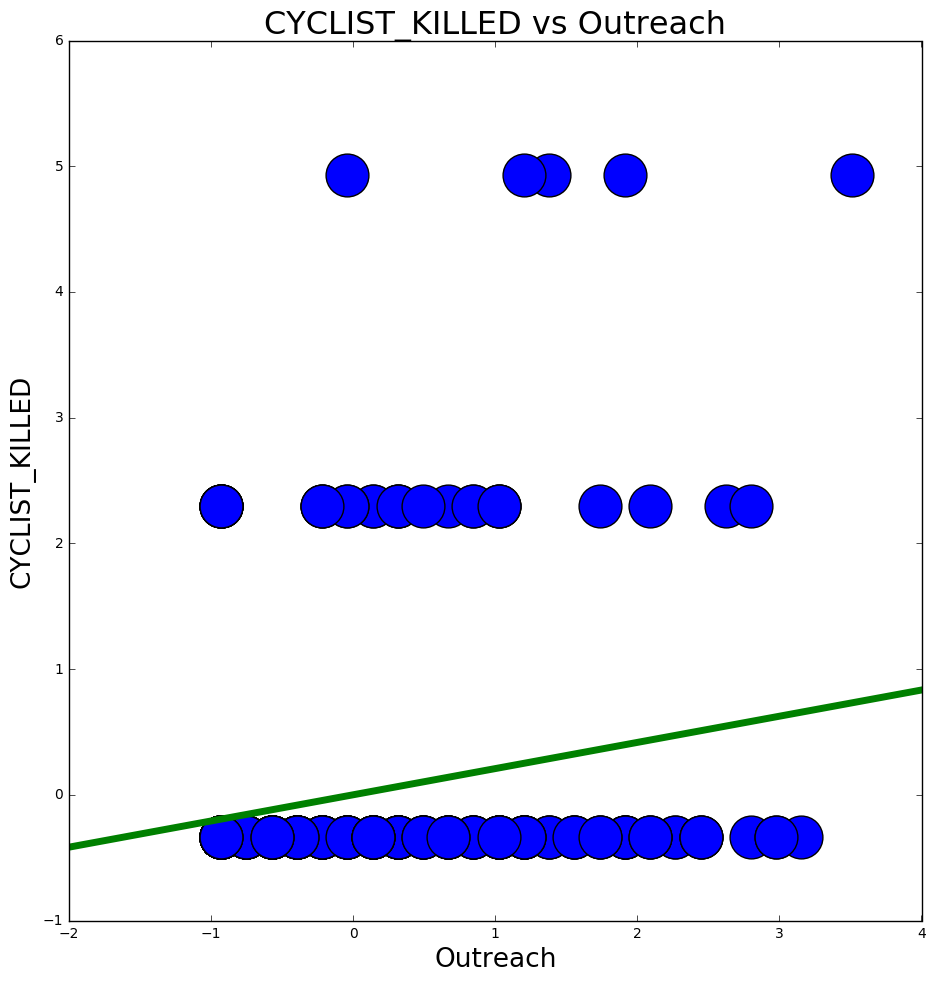

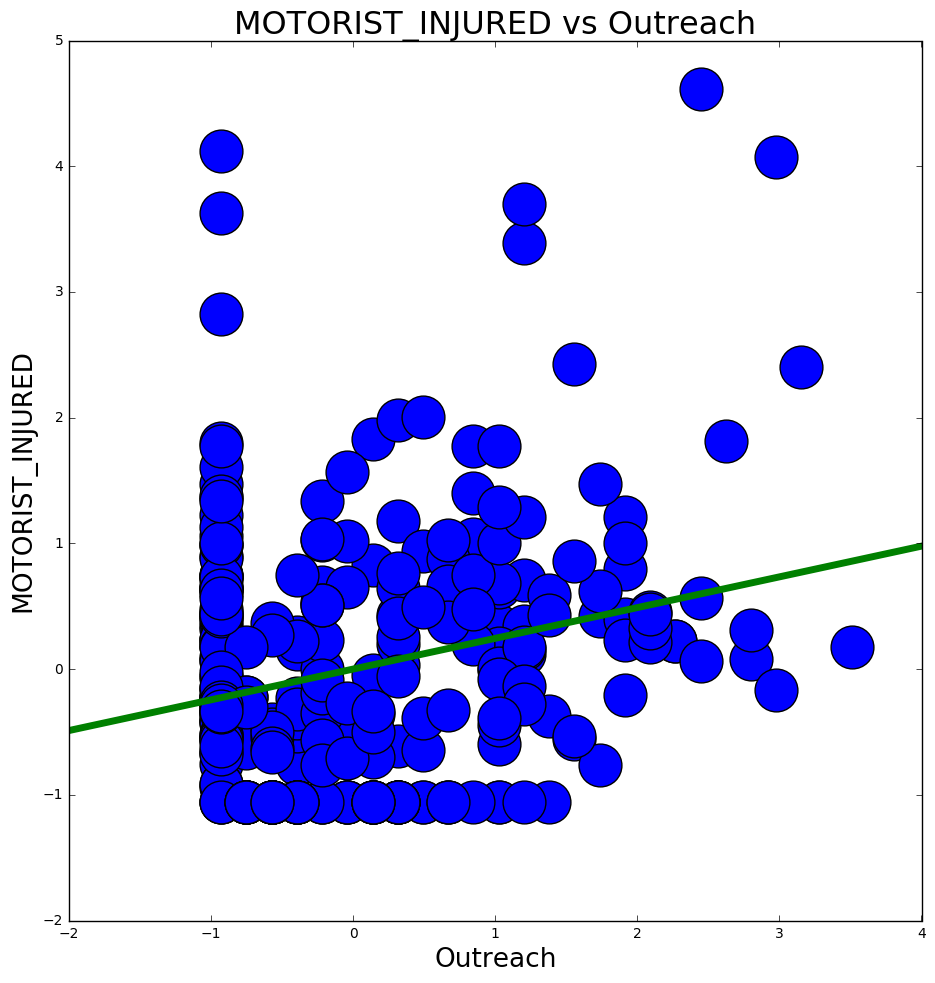

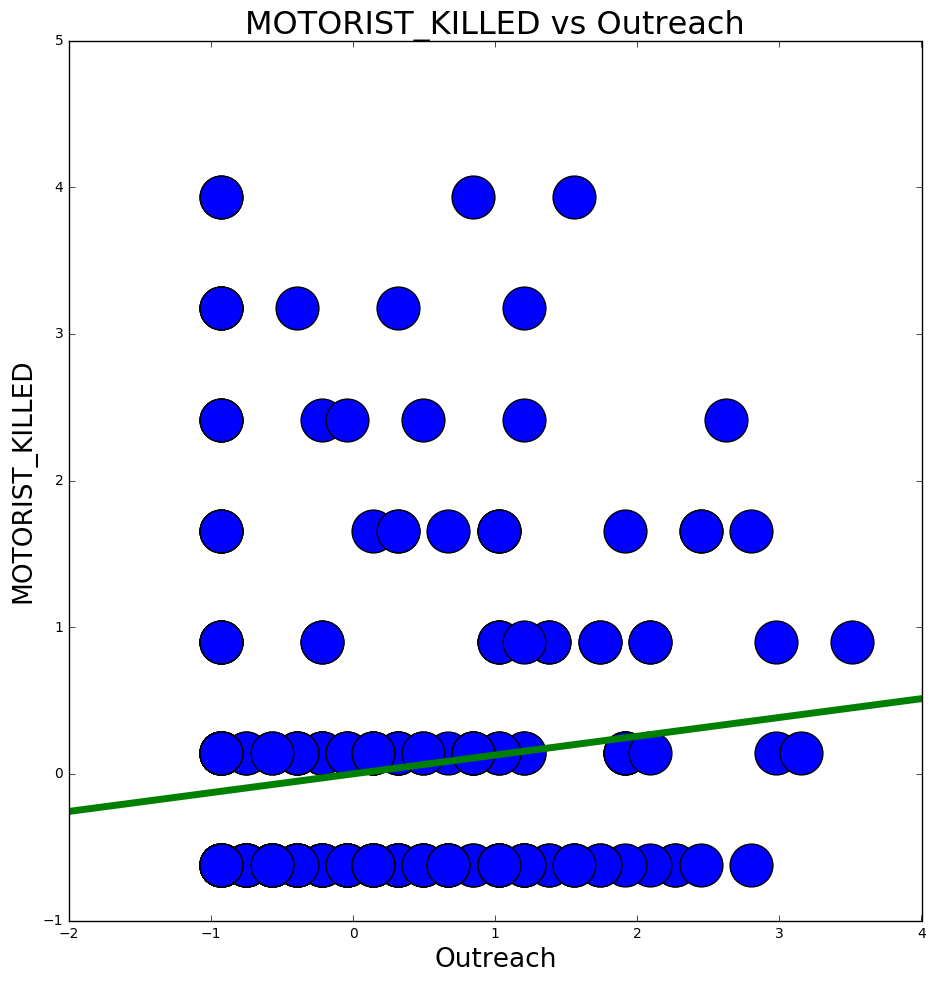

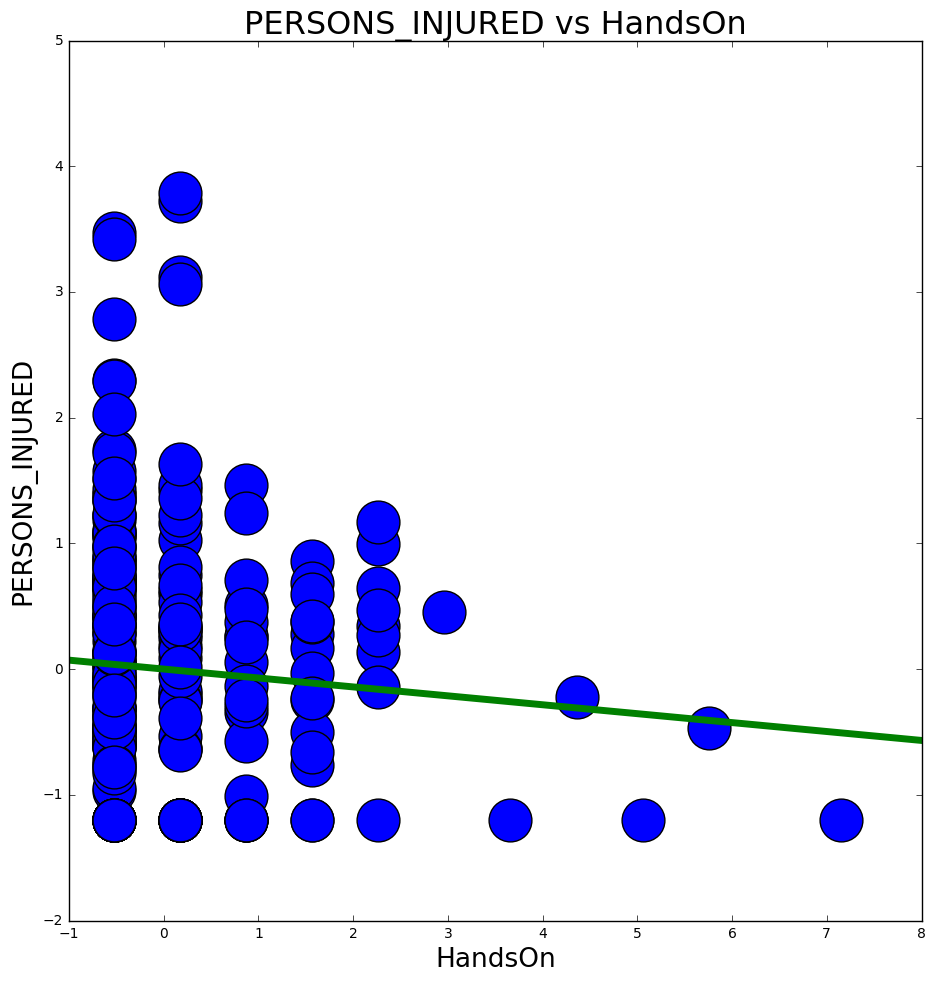

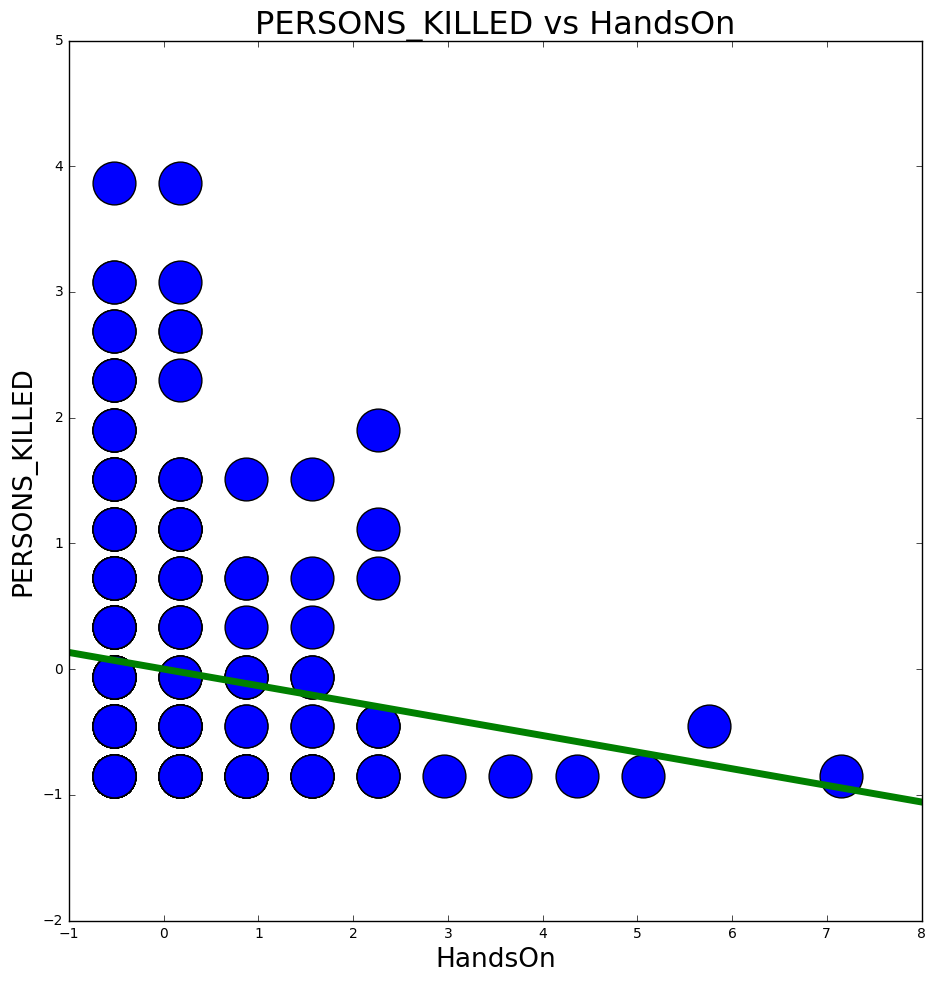

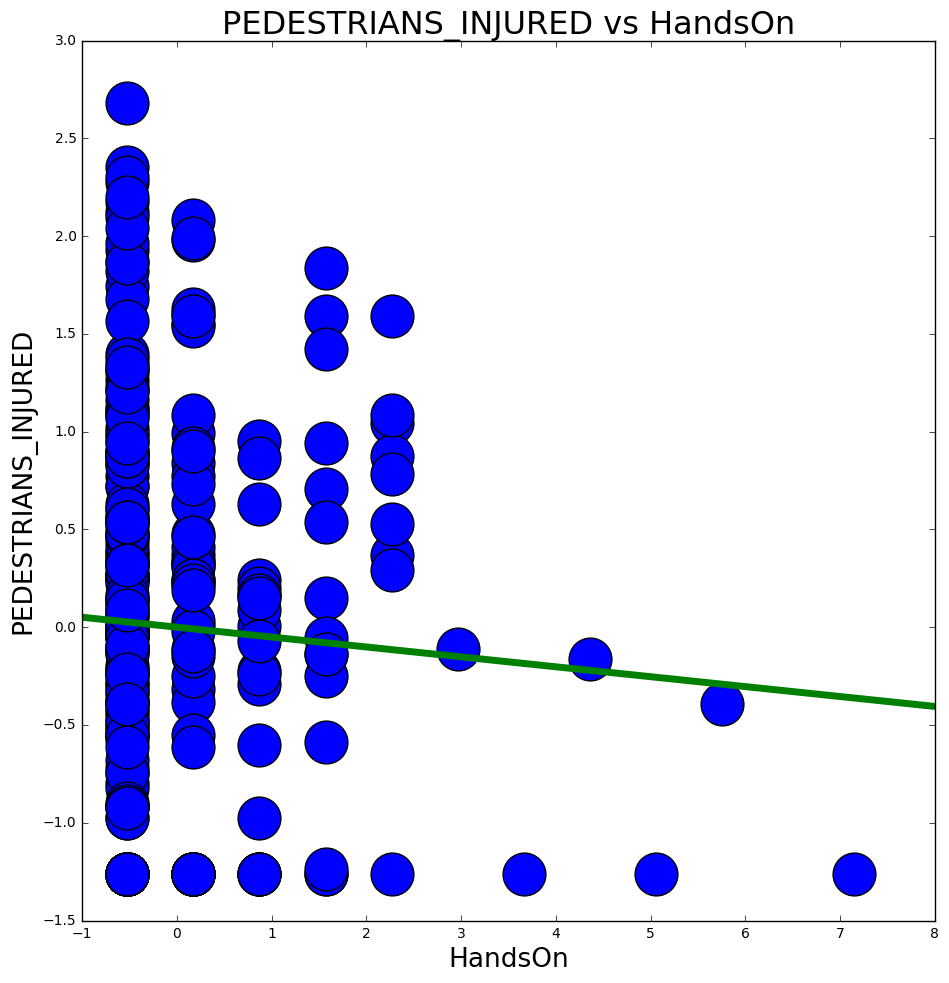

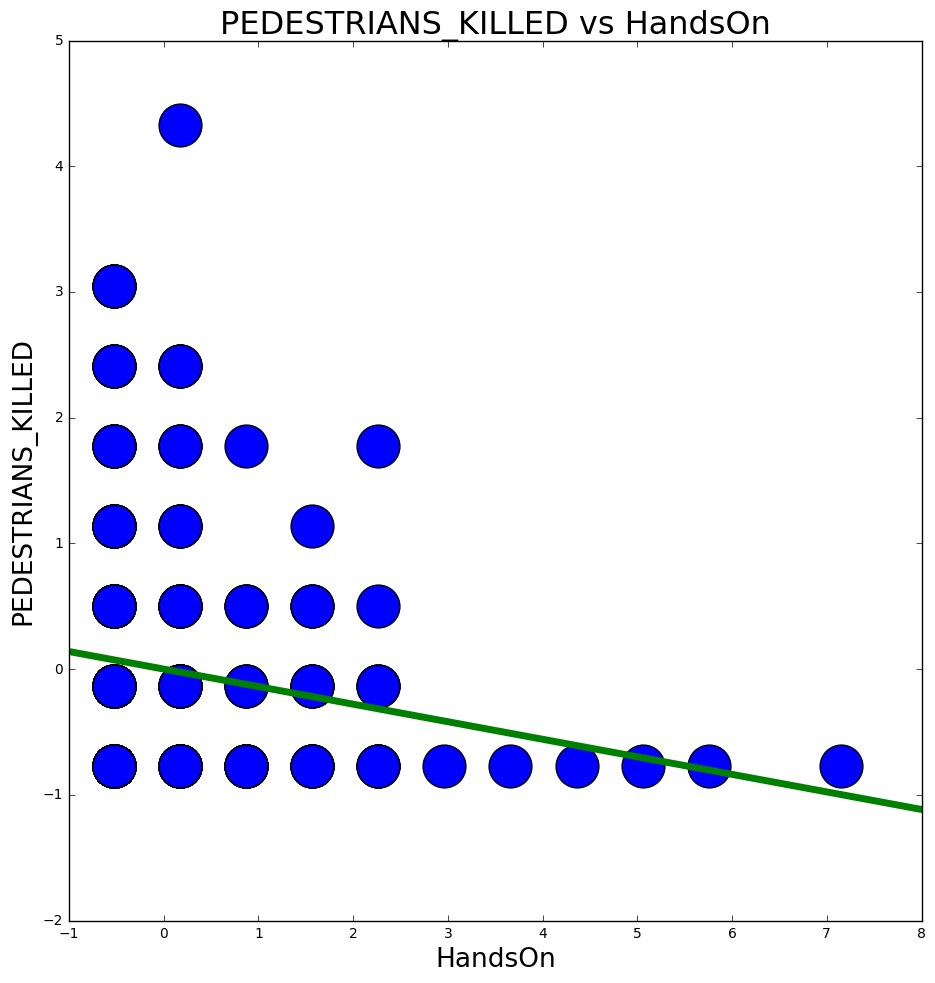

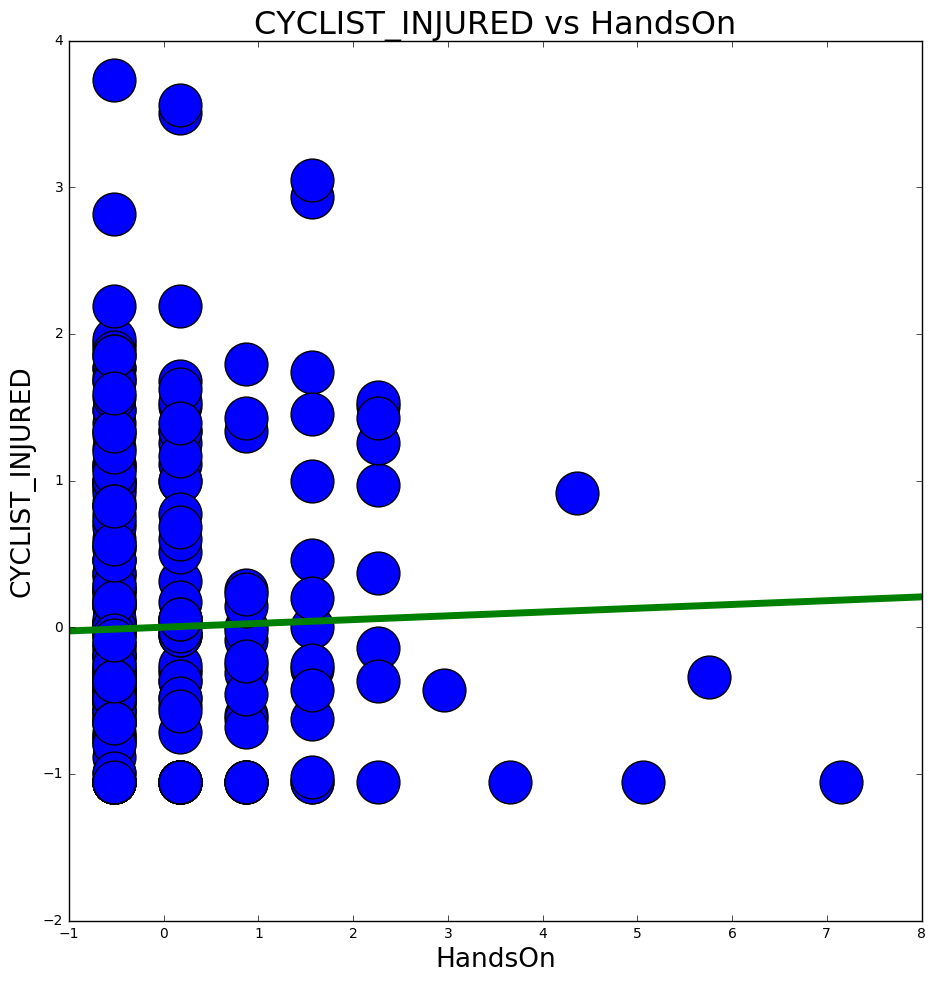

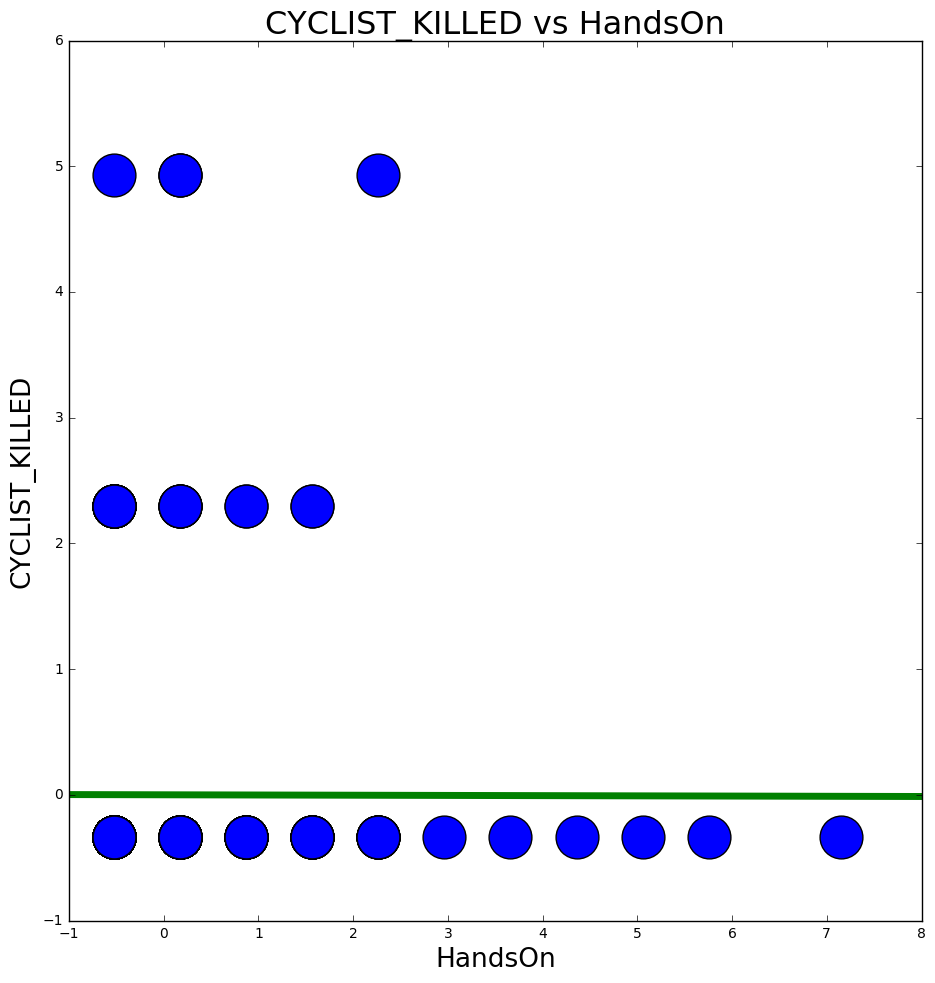

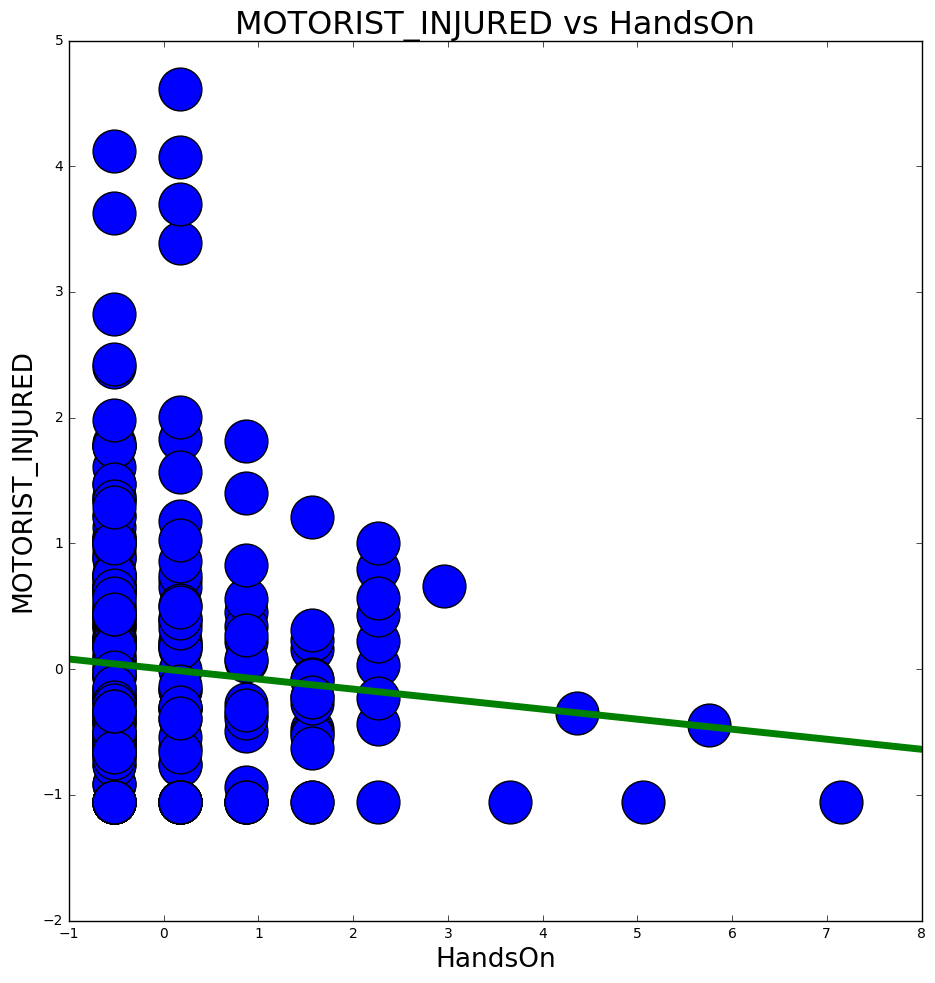

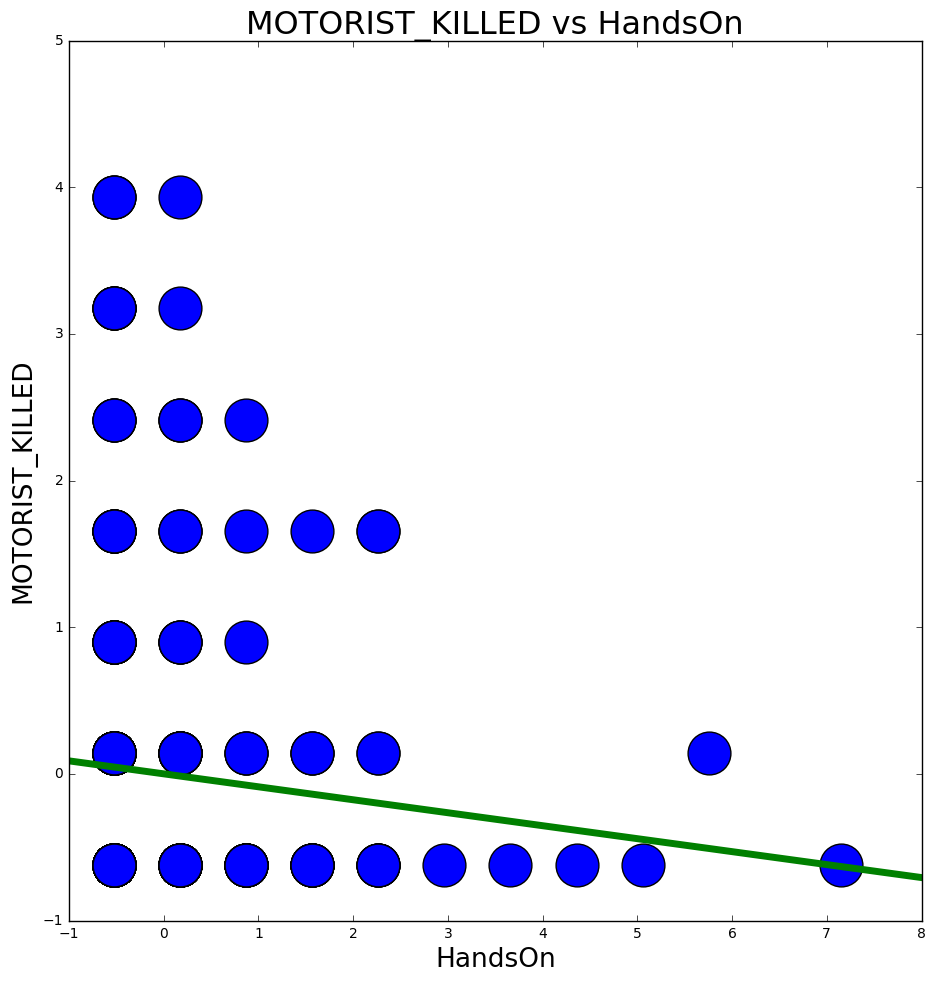

In [20]:
r_dict = {}
for n in colnames[0:5]:
    for m in colnames[6:14]:
        if m<>n:
            fig, ax = plt.subplots(figsize=(11,11))
            plt.subplots_adjust(bottom = 0.1)
            plt.scatter(df[n], df[m], marker = 'o', s = 950, cmap = plt.get_cmap('Spectral'))
    
            model = sm.ols(formula=m+' ~ ' + n, data = df).fit()
            abline_plot(model_results=model, ax=ax, color='green', linewidth = 5)

            ax.set_title(m+' vs ' + n, fontsize = 23)
            ax.set_ylabel(m, fontsize = 19)
            ax.set_xlabel(n, fontsize = 19)
    
            #print "Intercept (alpha) = ", model.params[0], ", t score for intercept (alpha) = ", model.tvalues[0]
            #print "Slope = (beta)", model.params[1], ", t score for slope (beta) = ", model.tvalues[1]

            #print '\n'+m +' vs '+ n + '\n'
            #print(model.summary())
            r_dict[model.rsquared] = [n, m, model.summary()]

0.110712489235 ['Taxis', 'CYCLIST_KILLED', <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:         CYCLIST_KILLED   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     37.72
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           2.56e-09
Time:                        15:42:37   Log-Likelihood:                -414.88
No. Observations:                 305   AIC:                             833.8
Df Residuals:                     303   BIC:                             841.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------

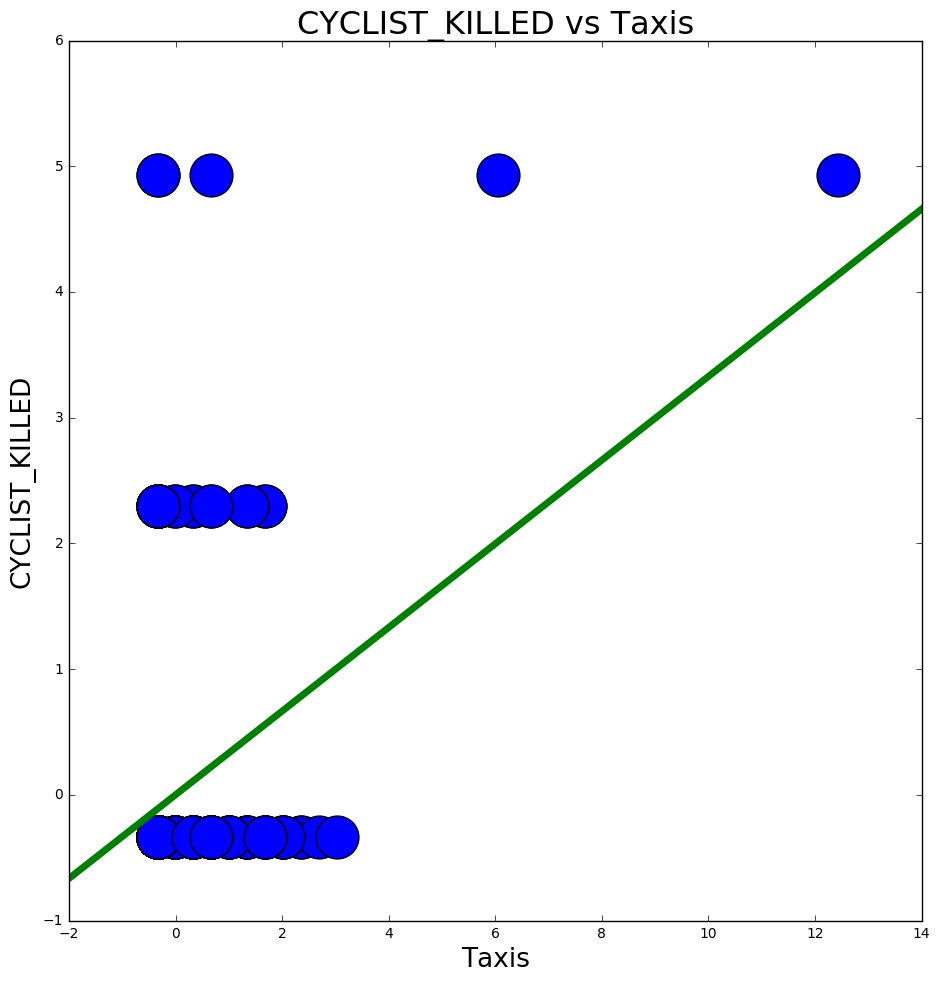

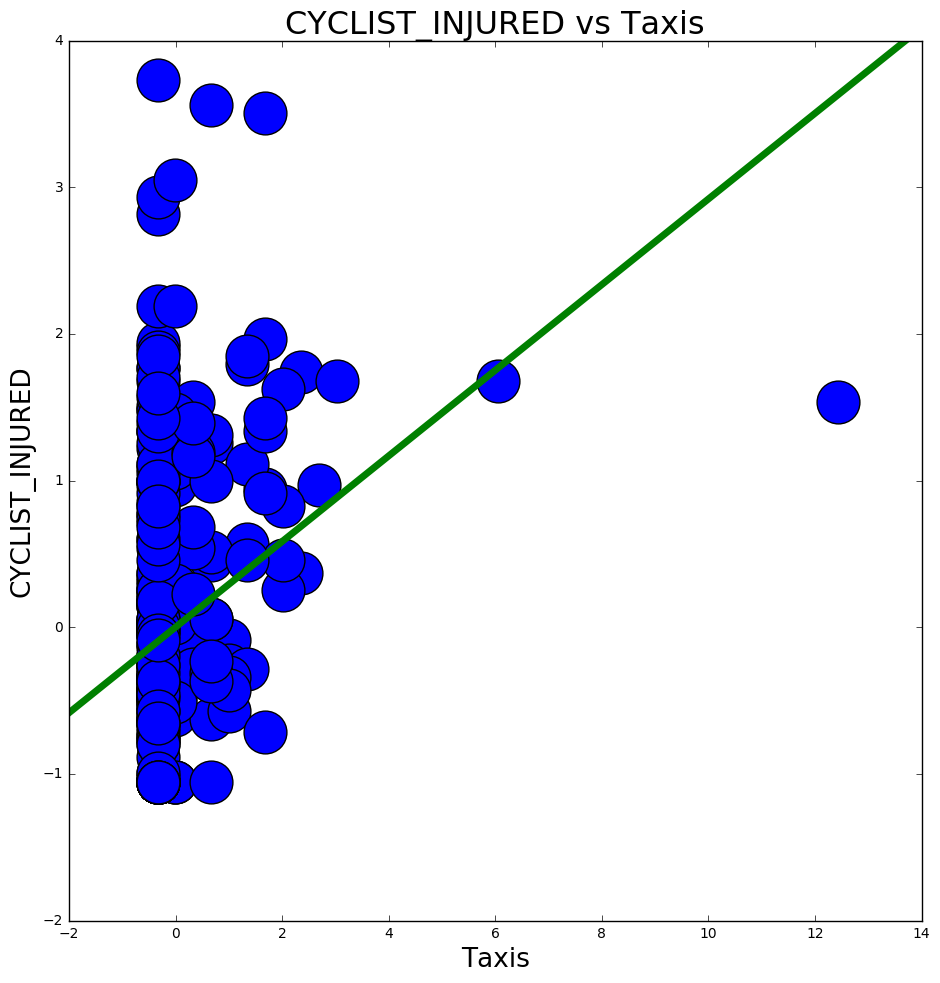

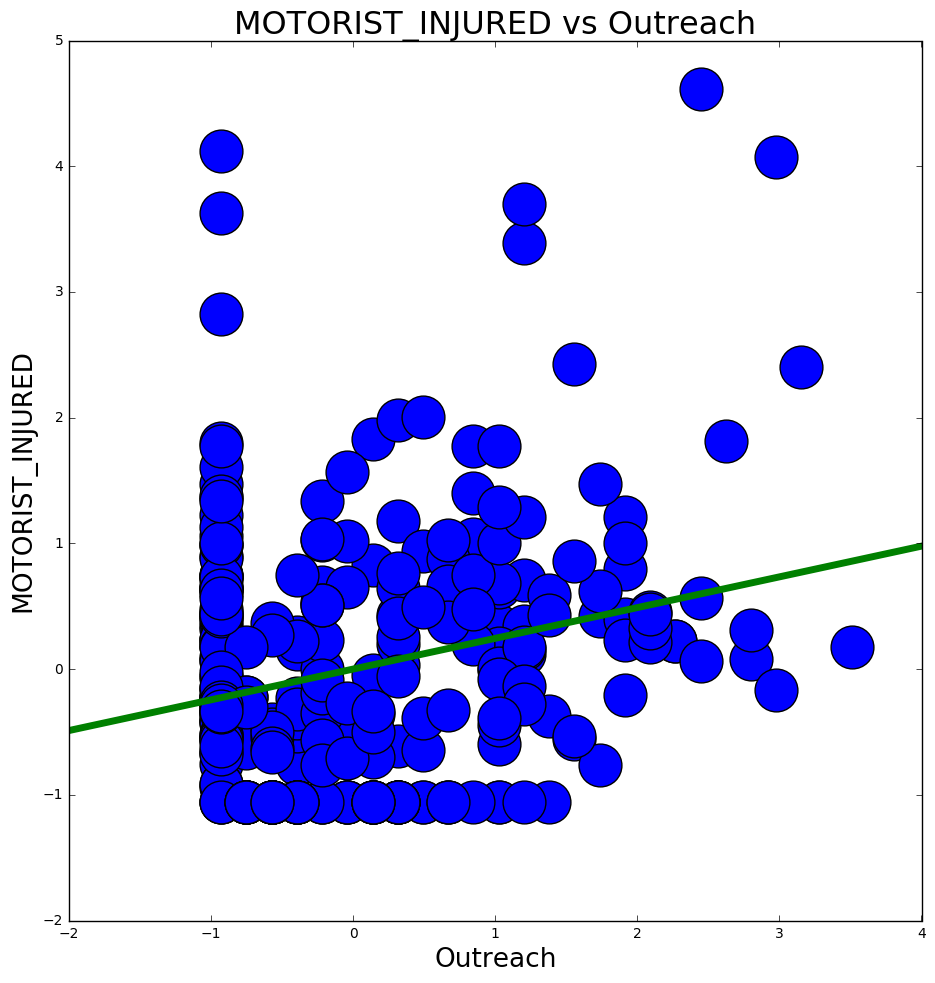

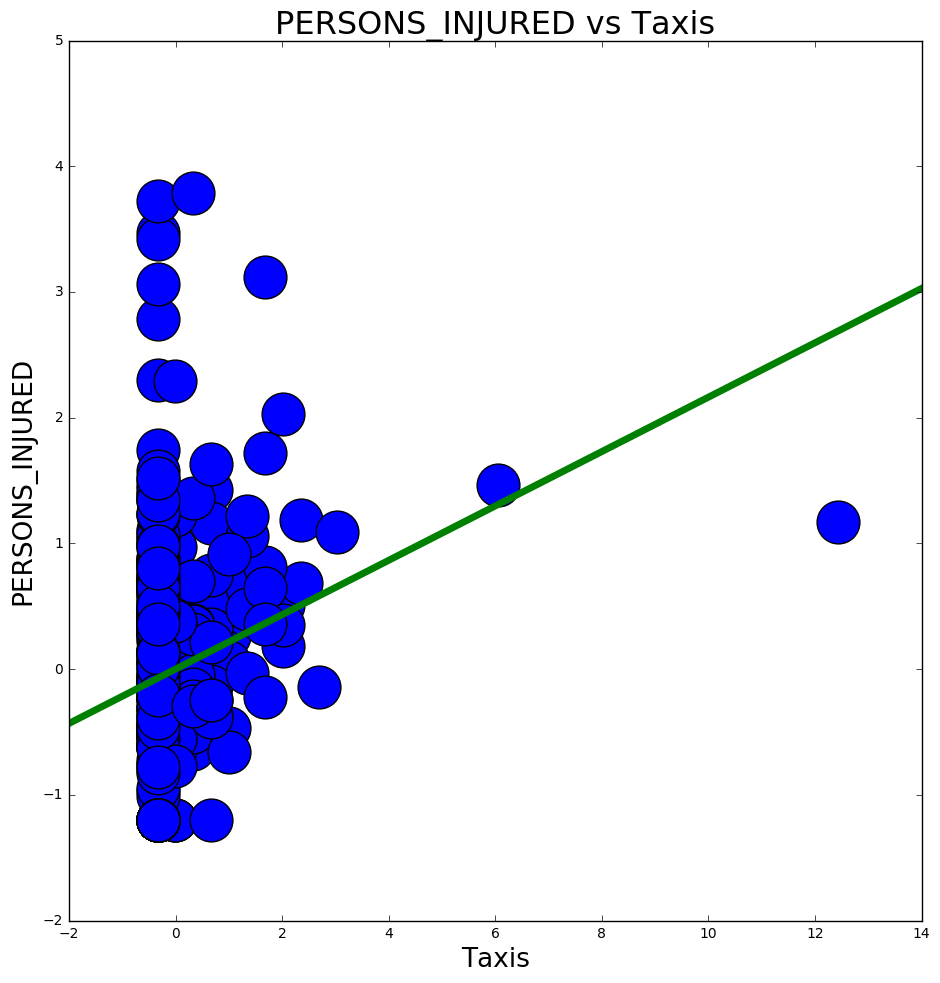

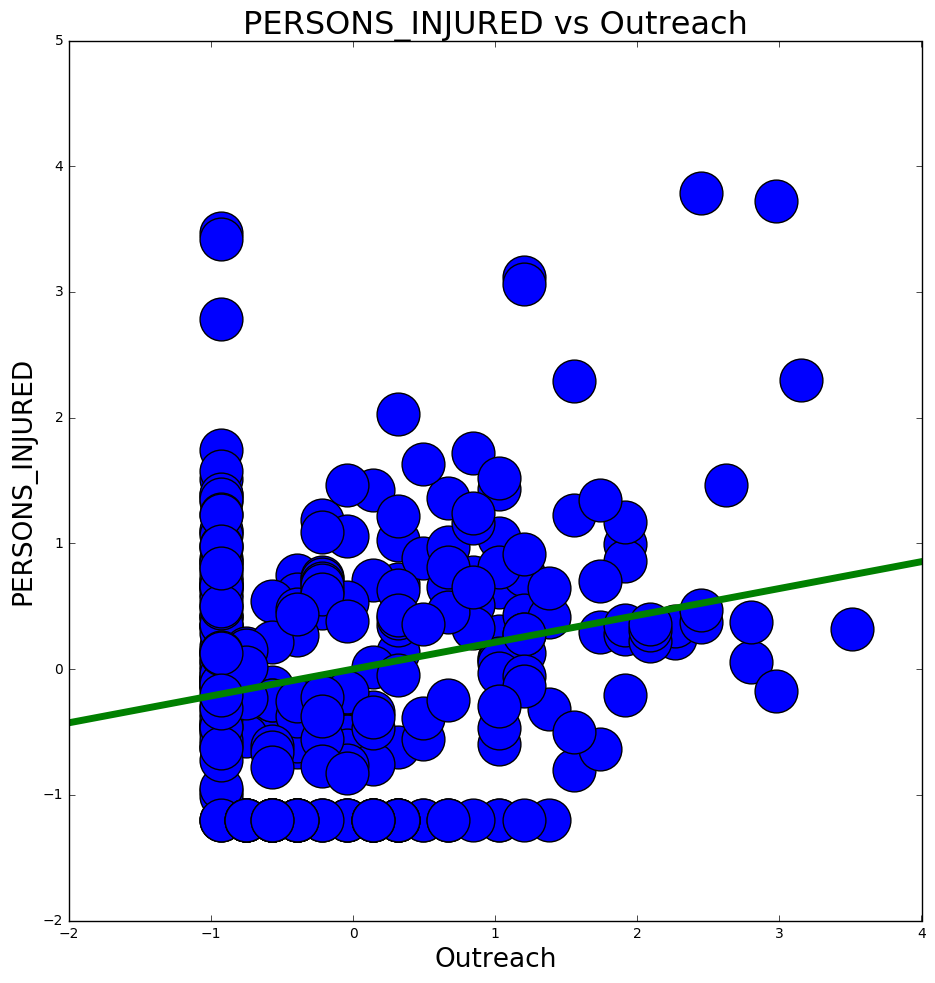

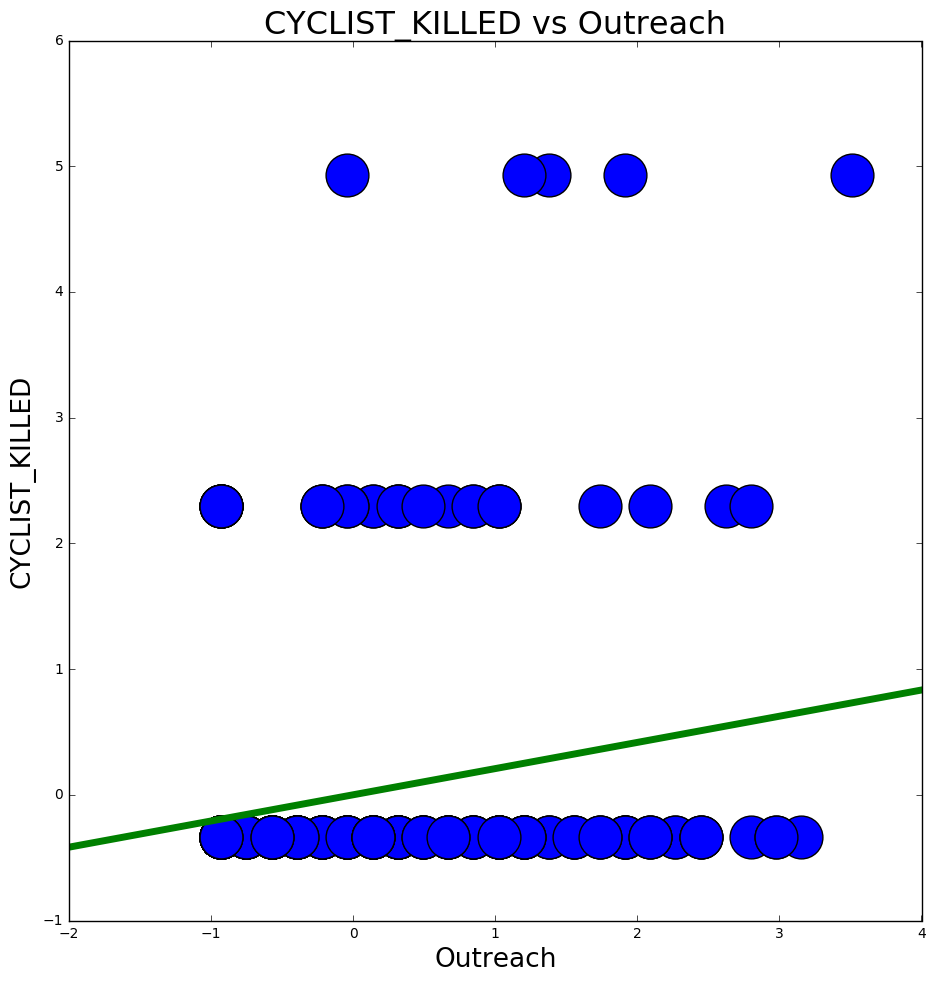

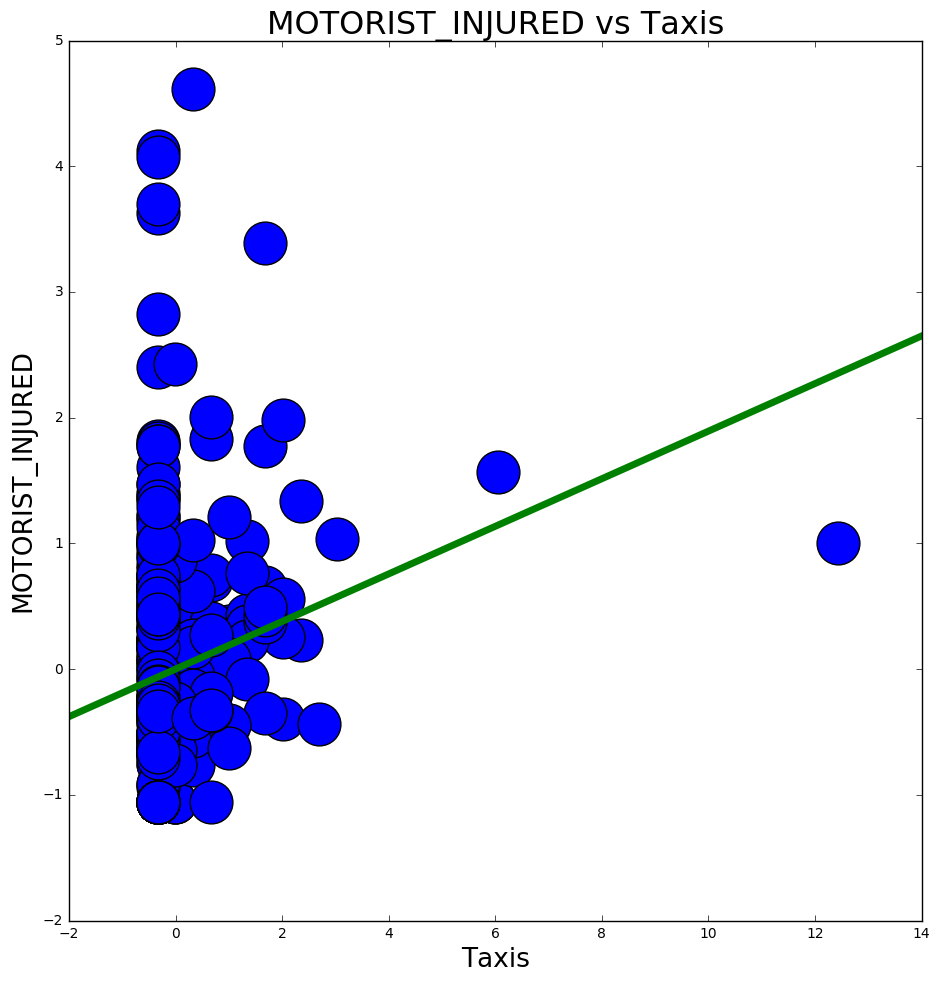

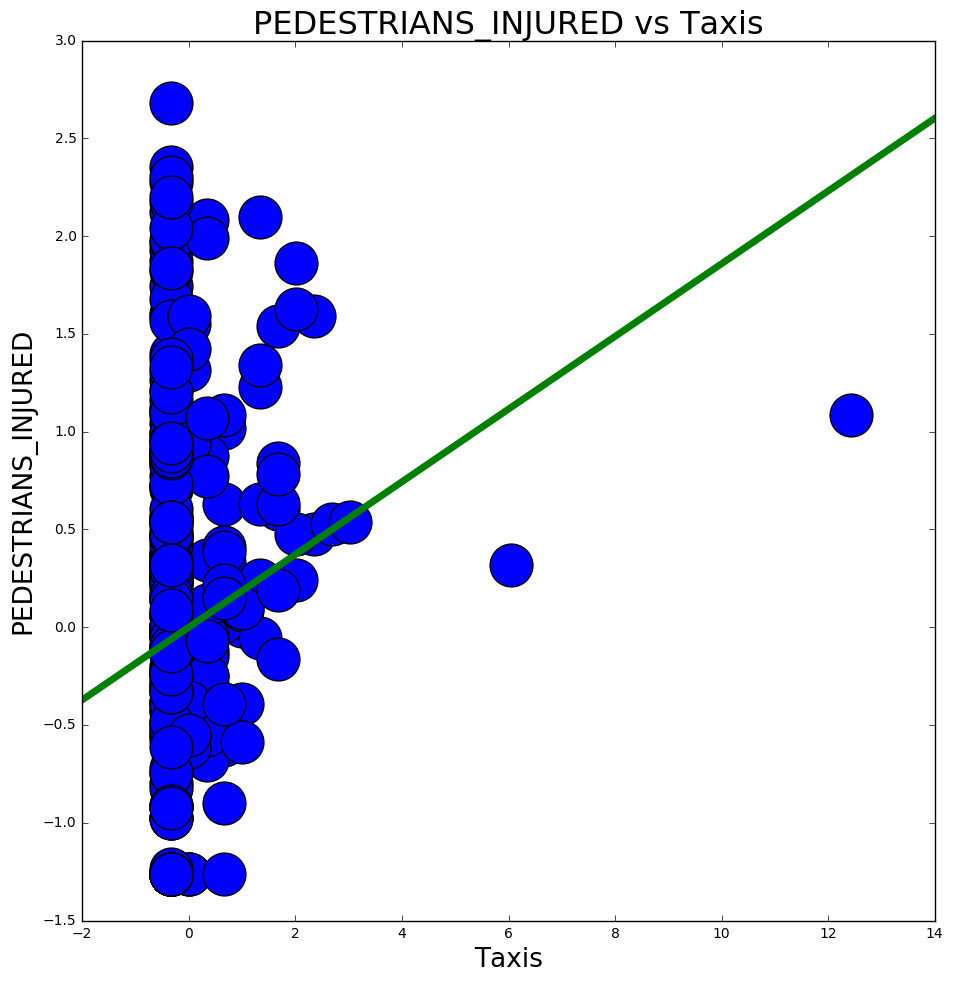

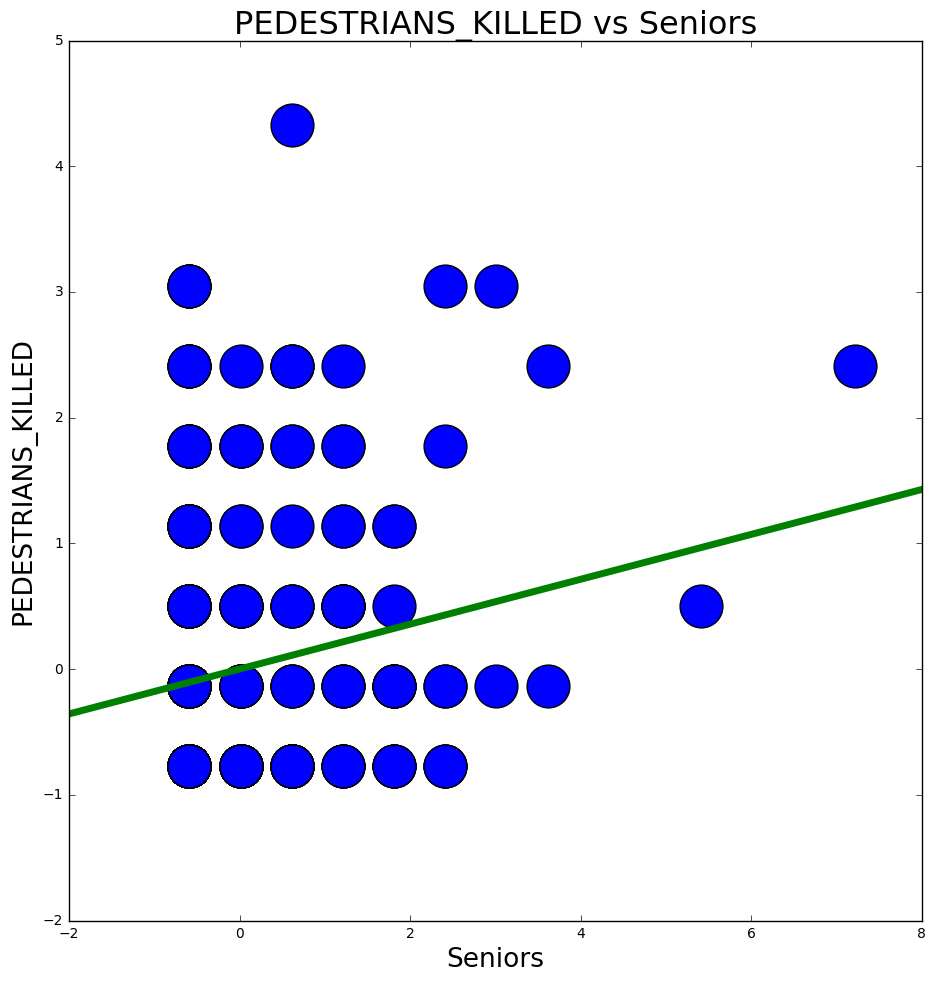

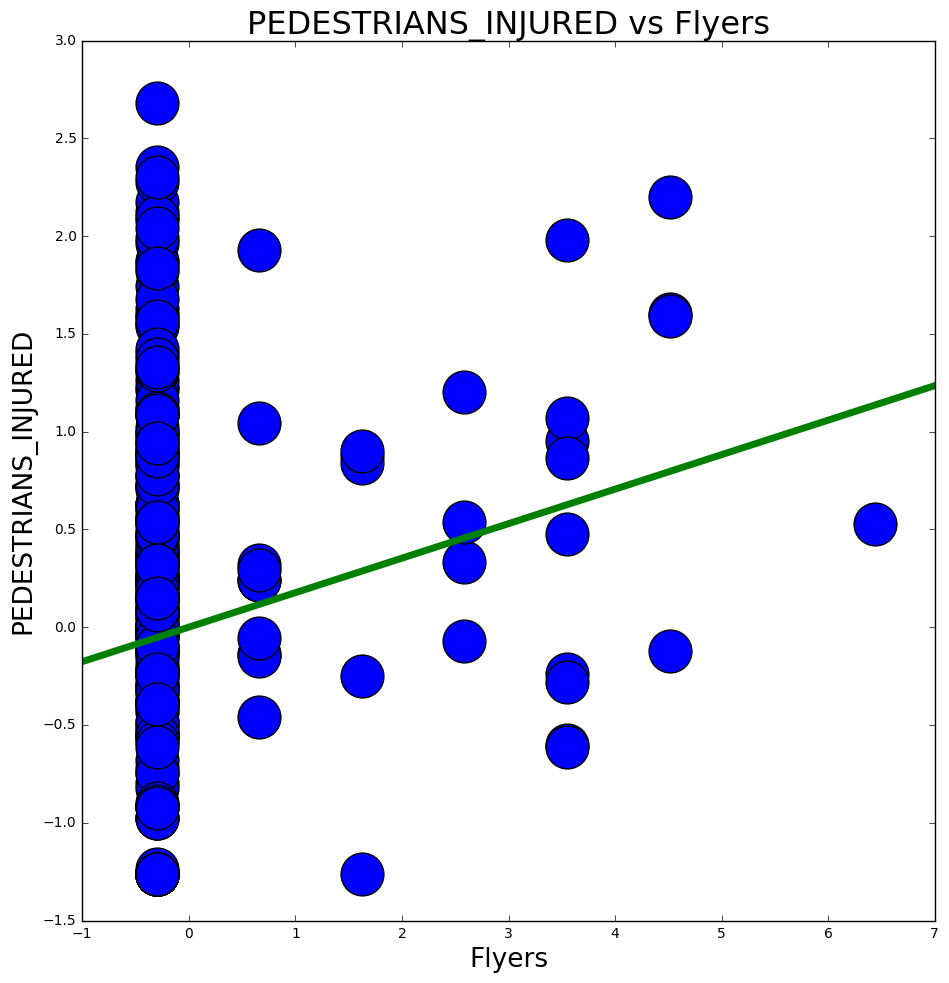

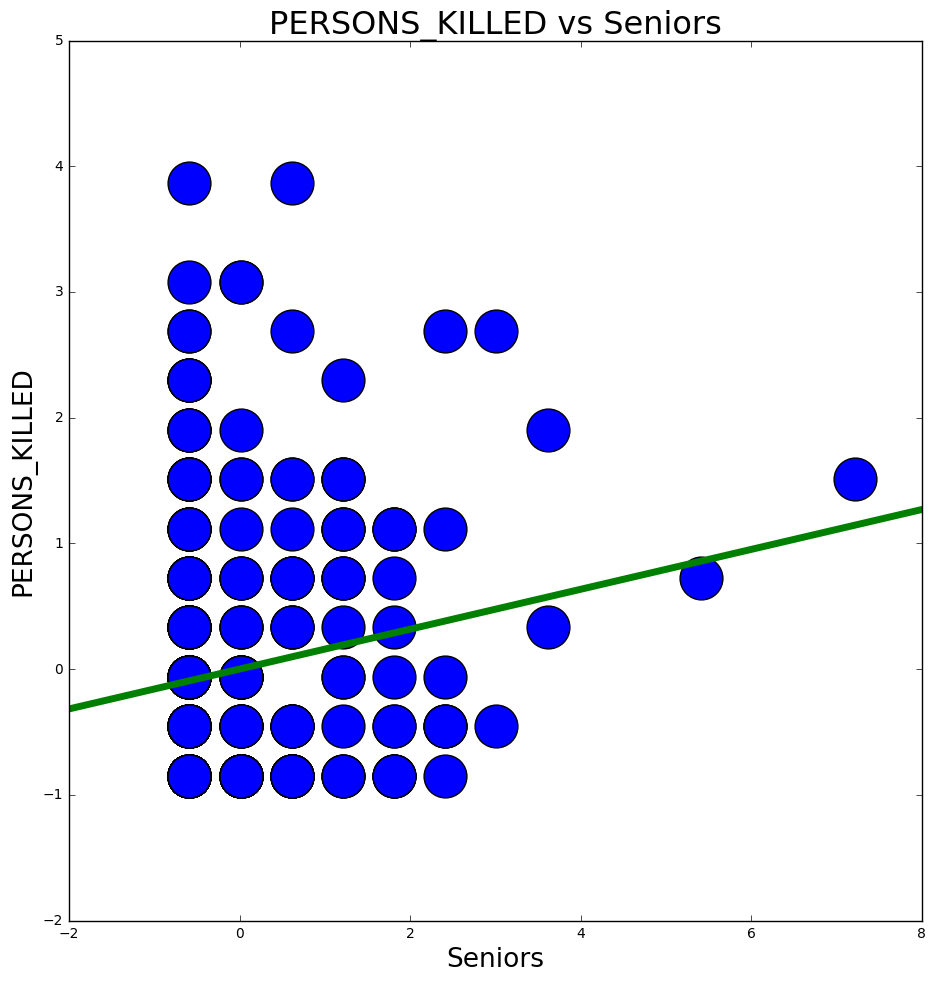

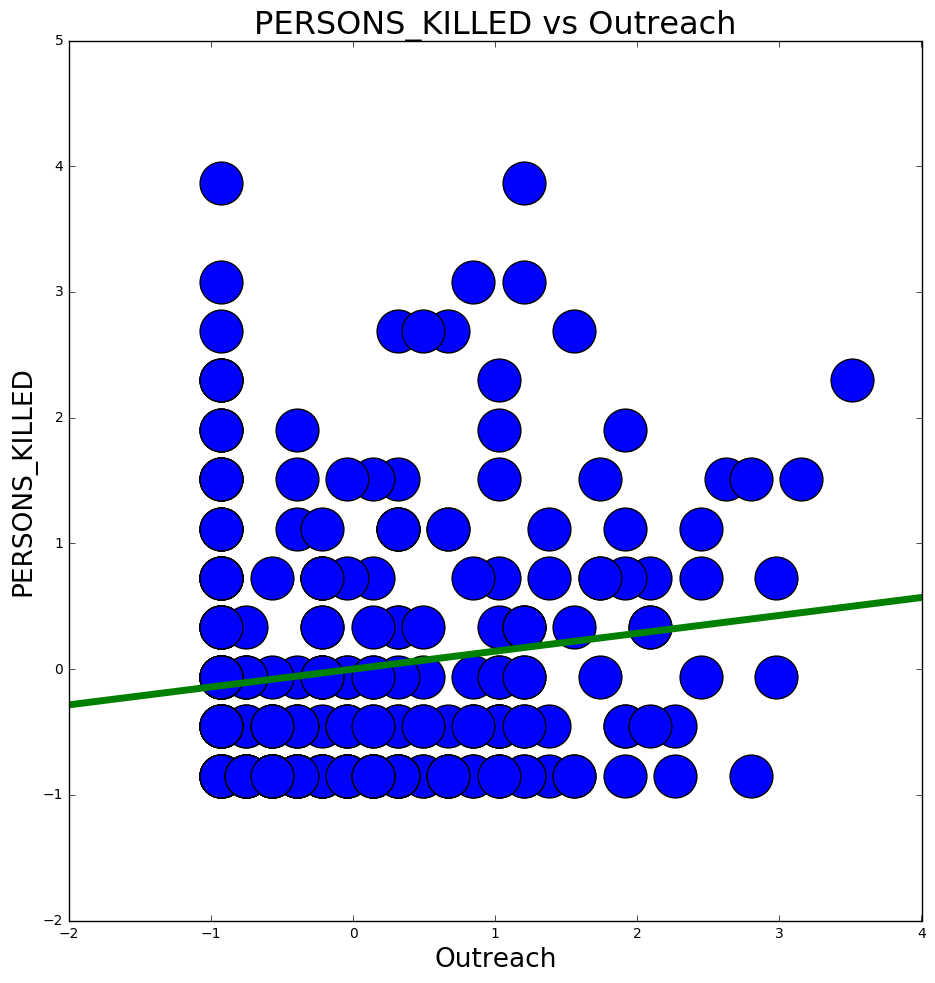

In [21]:
for k in np.sort(r_dict.keys())[::-1]:
    if k>0.02:
        print k, r_dict[k]
        n = r_dict[k][0]
        m = r_dict[k][1]
        fig, ax = plt.subplots(figsize=(11,11))
        plt.subplots_adjust(bottom = 0.1)
        plt.scatter(df[n], df[m], marker = 'o', s = 950, cmap = plt.get_cmap('Spectral'))
        model = sm.ols(formula=m+' ~ ' + n, data = df).fit()
        abline_plot(model_results=model, ax=ax, color='green', linewidth = 5)

        ax.set_title(m+' vs ' + n, fontsize = 23)
        ax.set_ylabel(m, fontsize = 19)
        ax.set_xlabel(n, fontsize = 19)